In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


# Введение

## Описание задачи
Я буду решать задачу регрессии: предсказывать цену продажи дома в округе Кинг на основе характеристик жилья. Данные покрывают сделки за период с мая 2014 до мая 2015 года

Отсюда первый важный момент – на цену продажи дома инфляция не будет существенно влиять. Если бы разброс в дате был сильнее, это необходимо было бы учитывать

**Что требуется сделать**
* Провести EDA и ресёрч-анализ: изучить признаки, визуализировать их распределения и связи с ценой
* Выполнить Feature Engineering: создать новые признаки, оценить их корреляцию и важность
* Построить простую модель и оценить ее
* Провести эксперименты с несколькими семействами моделей, оценить их по метрикам(выбрал MAE, RMSE, R2), сделать кросс-валидацию и выбрать лучшую

In [2]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.shape

(21613, 21)

## Описание колонок

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Использовал describe, чтобы посмотреть, какие минимальные и максимальные значения столбцов представлены в датасете, это нужно в первую очередь для оценок(grade, condition, view)

* id: id записи
* date: Дата продажи
* price: Цена продажи дома в долларах США
* bedrooms: Количество спален
* bathrooms: Количество ванных комнат
* sqft_living: Площадь жилой части дома
* sqft_lot: Площадь участка
* floors: Число этажей
* waterfront: Находится ли дом на берегу (1 – да, 0 – нет)
* view: Оценка вида с дома (0–4)
* condition: Состояние дома (1 – плохо, 5 – отлично)
* grade: Качество и дизайн здания (1–13)
* sqft_above: Площадь дома без учёта цокольного этажа
* sqft_basement: Площадь цокольного этажа
* yr_built: Год постройки
* yr_renovated: Год последнего ремонта
* zipcode: Почтовый индекс
* lat: Географическая широта
* long: Географическая долгота
* sqft_living15: Средняя жилая площадь ближайших 15 домов
* sqft_lot15: Средняя площадь участка ближайших 15 домов

## Проверка на пропуски

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Данные очень чистые, пропусков нет совсем

## Проверка типов данных

In [8]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Все здесь является числом, кроме даты, поэтому нужно преобразовать ее. Для этого преобразуем object в стандартный datetime

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

Изначально в данных после метки T(время) было указано как 00.., то есть время не было указано вовсе, проверим, что это действительно так, и мы можем со временем даже не работать

In [11]:
df['date'].dt.time.unique()

array([datetime.time(0, 0)], dtype=object)

Действительно, существует лишь одно уникальное значение, поэтому о времени можем не задумываться. Теперь преобразуем эту колонку в 4 других, вытащим месяц, квартал, день недели, и день продажи, посмотрим, имеет ли это какой-то эффект

В дальнейшем все эксперименты буду проводить с data, а df пусть будет чистым датафреймом с измененной колонокой date

In [12]:
data = df.copy()

In [13]:
data['sale_month'] = df['date'].dt.month
data['sale_quarter'] = df['date'].dt.quarter
data['sale_weekday'] = df['date'].dt.weekday
data['sale_day'] = df['date'].dt.day

# EDA + Feature Engineering

В процессе EDA будут постепенно создаваться новые фичи, которые придут в голову. Так что этапы будут пересекаться друг с другом. И после окончания EDA, создания простой модели, еще раз проведу Feature Engineering с добавлением новых фич с целью улучшения показателей модели

## Распределение цены

In [14]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set_palette("pastel")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

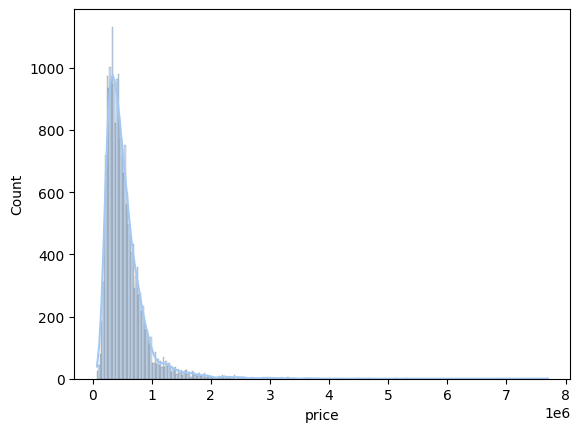

In [15]:
sns.histplot(data=data, x='price', kde=True)

In [16]:
data['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Сильное правостороннее смещение, большинство сделок до 1 миллиона, при этом есть очень дорогие и редкие объекты, выбросы, сильно растягивающие график

In [17]:
data['price'].quantile(0.99)

1964400.0000000051

In [18]:
data.query('price > 1964400').shape

(217, 25)

Более 99 перцентиля лишь 217 домов, планка около 2 миллионов. На данный момент все оставим, как есть, а после первичного обучения модели можно будет посмотреть, что сделать:
* лог-трансформация таргета, чтобы снизить влияние выбросов
* ограничение по 99 перцентилю, все цены выше заменим на эту границу
* удалим выбросы

## Дата продажи

Для начала взглянем на общее число продаж по месяцам

<Axes: xlabel='sale_month', ylabel='count'>

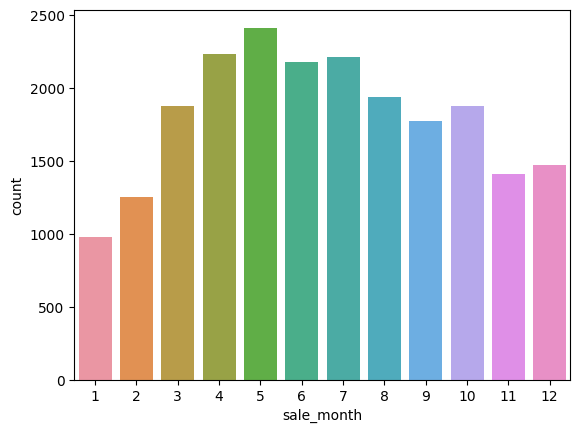

In [19]:
sns.countplot(data=data, x='sale_month')

Сделки начинают активно идти с началом весны, продолжают летом, и падают к ноябрю, не поднимаясь и после новогодних праздников. Снижение спроса в это время может говорить о снижении цены на продажу домов в эти месяцы

<Axes: xlabel='sale_month', ylabel='price'>

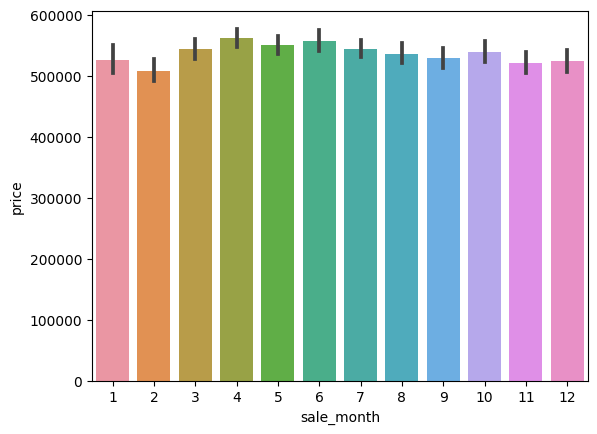

In [20]:
sns.barplot(x='sale_month', y='price', data=data)

* Невысокие показатели в январе и феврале, что может быть связано с низкой активностью рынка после новогодних праздников
* Пик в апреле–мае. В апреле средняя цена достигает максимума, а в мае остаётся на весьма высоком уровне. Это совпадает с наибольшим числом сделок: спрос растёт весной, поднимая цены
* После весеннего пика наблюдается постепенное снижение средней стоимости вплоть до ноября
* Сезонность. Весенний подъём цен и сделок, низкий уровень зимой. Стоит закодировать месяц как циклический признак, чтобы модель уловила этот годовой цикл

<Axes: xlabel='sale_quarter', ylabel='price'>

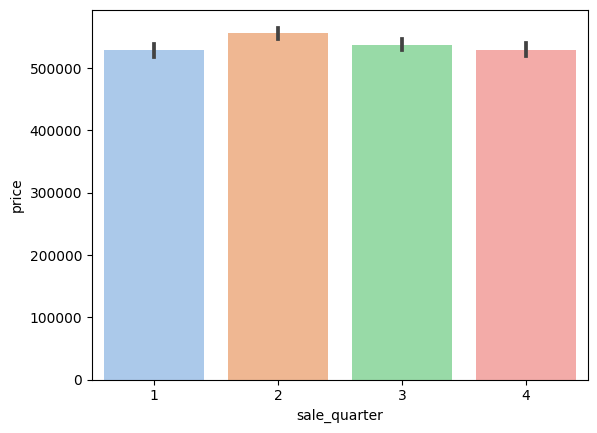

In [21]:
sns.barplot(x='sale_quarter', y='price', data=data)

В графике по кварталам видим менее значительные отличия, но общая картина похожа

In [22]:
data['sale_quarter'].value_counts()

sale_quarter
2    6825
3    5925
4    4760
1    4103
Name: count, dtype: int64

<Axes: xlabel='sale_day', ylabel='price'>

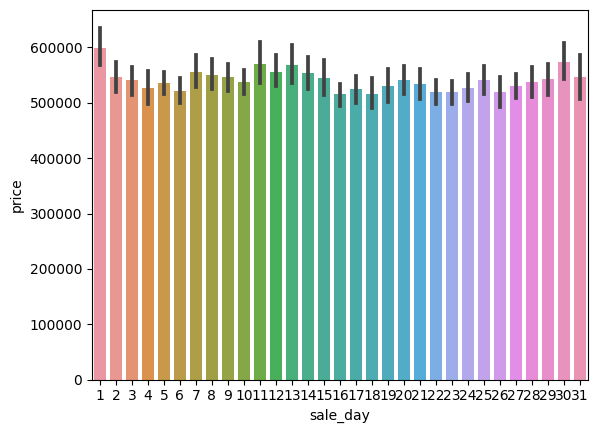

In [23]:
sns.barplot(x='sale_day', y='price', data=data)

Конкретный день продажи не влияет на цену

<Axes: xlabel='sale_day', ylabel='count'>

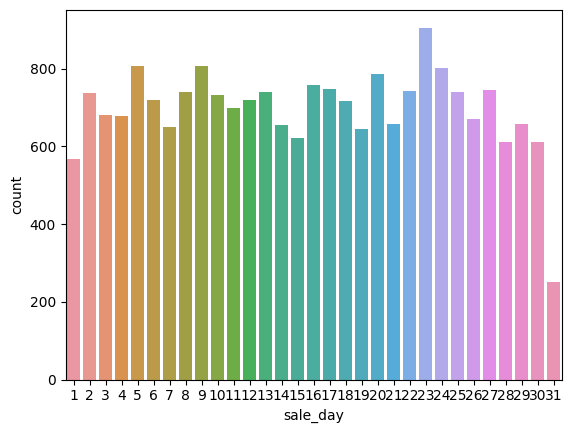

In [24]:
sns.countplot(data=data, x='sale_day')

И по количеству сделок так же, есть видимый пик в 23 число. На 31 приходится меньше сделок, что логично, не во всех месяцах есть эти даты. Что относится и к другим последним датам после 28 числа

<Axes: xlabel='sale_weekday', ylabel='price'>

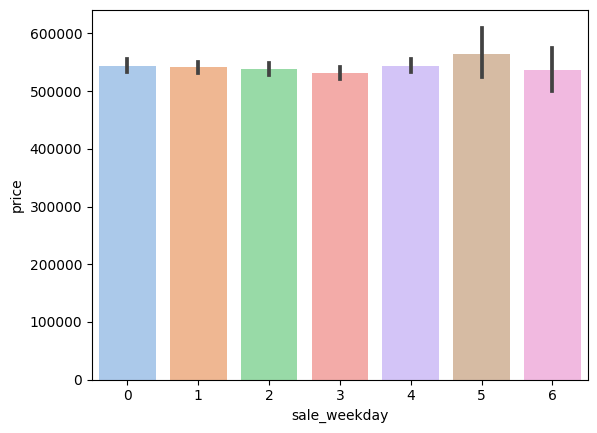

In [25]:
sns.barplot(x='sale_weekday', y='price', data=data)

Заметно небольшое увеличение цены на выходных

<Axes: xlabel='sale_weekday', ylabel='count'>

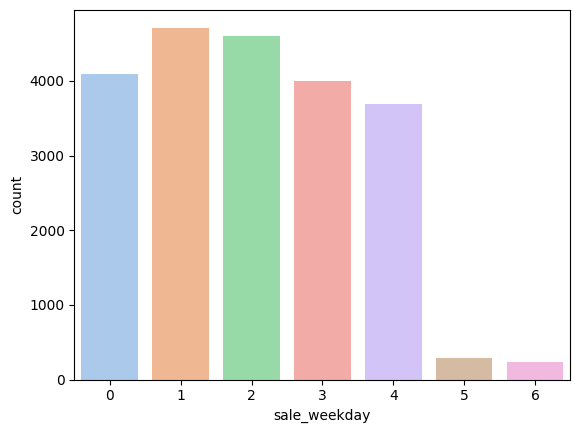

In [26]:
sns.countplot(data=data, x='sale_weekday')

Увидим, что количество продаж в выходные заметно ниже. 

Построим отдельный булевый признак, который говорит, выходной день или нет

In [27]:
data['is_weekend'] = data['sale_weekday'].isin([5, 6]).astype(int)

Так как в продажах была замечена сезонность(зимой ниже, весной выше), переведем дату в точку на окружности, используя функции синуса и косинуса. Таким образом номер месяца станет точкой на окружности, а месяца декабрь и январь (12 и 1) окажутся рядом друг с другом в данных

In [28]:
data['month_sin'] = np.sin(2 * np.pi * data['sale_month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['sale_month'] / 12)

<Axes: xlabel='month_cos', ylabel='price'>

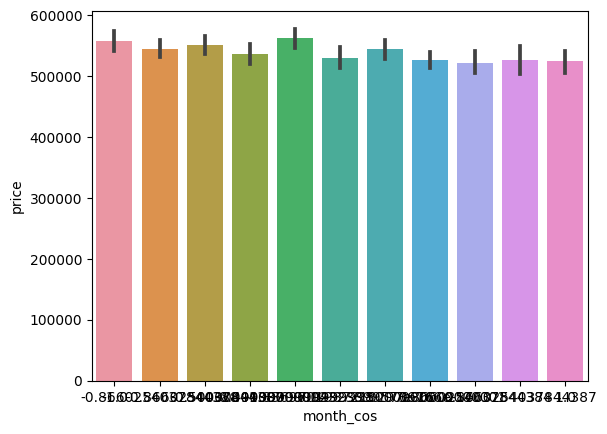

In [29]:
sns.barplot(x='month_cos', y='price', data=data)

<Axes: >

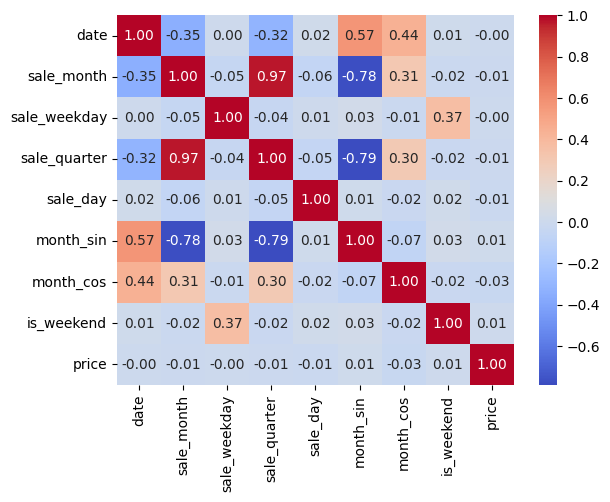

In [30]:
sns.heatmap(data[['date', 'sale_month', 'sale_weekday', 'sale_quarter', 'sale_day', 'month_sin', 'month_cos', 'is_weekend', 'price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')

* Корреляция показала слабую связь между временными признаками и ценой
* Вероятно все фичи по дням недели уйдут в итоговой модели и не будут полезны
* Однако month_cos из-за своей цикличности все же показал корреляцию чуть выше, чем остальные признаки

## Анализ площадей

### Площадь дома

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_living', ylabel='Count'>

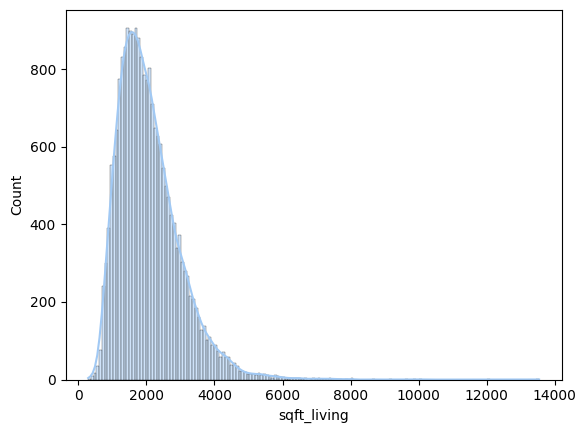

In [31]:
sns.histplot(data=data, x='sqft_living', kde=True)

Большинство домов имеют площадь примерно 1000-3000 sqft, пик плотности приходится на 1900

Рассмотрим отдельно и площадь участка

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_lot', ylabel='Count'>

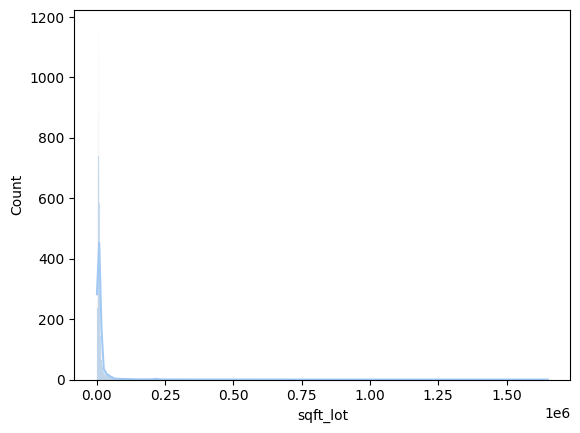

In [32]:
sns.histplot(data=data, x='sqft_lot', kde=True)

Оказалось очень много выбросов, поэтому построим график только для площадей менее 100000 sqft

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_lot', ylabel='Count'>

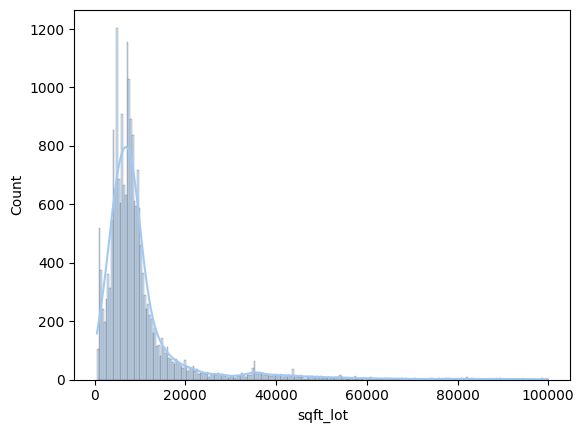

In [33]:
sns.histplot(data=data[data['sqft_lot'] < 100_000], x='sqft_lot', kde=True)

Площадь участка сосредоточена в диапазоне от 3000 до 15000 sqft

In [34]:
data[['sqft_living', 'sqft_lot']].describe()

,sqft_living,sqft_lot
count,21613.000000,2.161300e+04
mean,2079.899736,1.510697e+04
std,918.440897,4.142051e+04
min,290.000000,5.200000e+02
25%,1427.000000,5.040000e+03
50%,1910.000000,7.618000e+03
75%,2550.000000,1.068800e+04
max,13540.000000,1.651359e+06


<Axes: xlabel='sqft_living'>

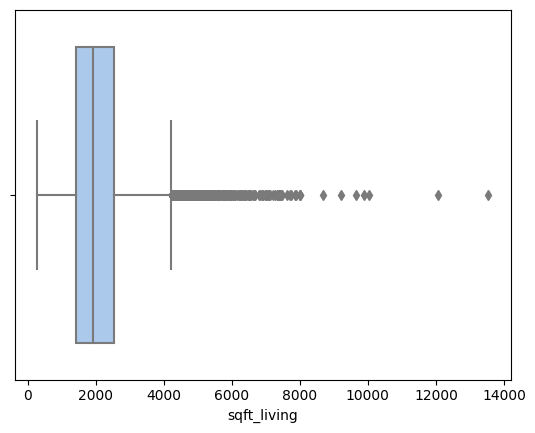

In [35]:
sns.boxplot(data=data, x='sqft_living')

Медиана жилой площади составляет 1910 sqft, IQR от 1427 до 2550, при этом есть много выбросов

<Axes: xlabel='sqft_lot'>

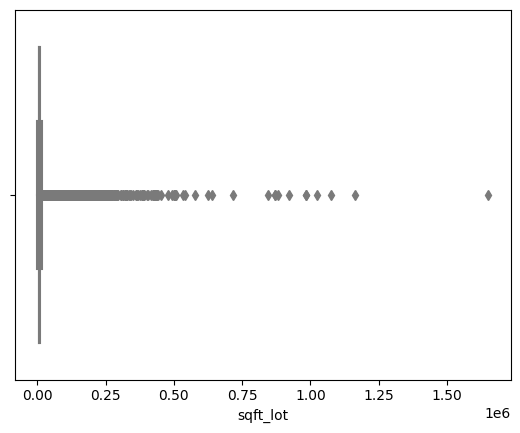

In [36]:
sns.boxplot(data=data, x='sqft_lot')

In [37]:
data['sqft_lot'].quantile(0.9)

21397.599999999995

<Axes: xlabel='sqft_lot'>

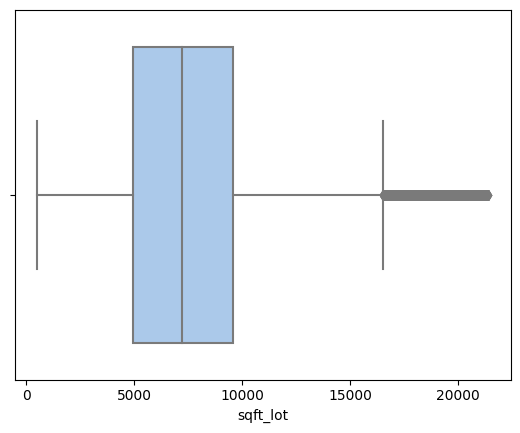

In [38]:
sns.boxplot(data=data.query('sqft_lot < 21397'), x='sqft_lot')

Медиана для площади участка 7600 sqft, также наблюдаем довольно большое число выбросов. IQR от 5000 до 10000

В целом ящики с усами показали, что для обоих признаков есть сотни значений, которые существенно выше усов. Эти значения могут повлиять на метрики моделей. В дальнейшем можно будет поработать с выбросами и тут, преобразовав их

Исследуем зависимость между ценой и площадью дома, тут должна быть довольно сильная корреляция

<Axes: xlabel='sqft_living', ylabel='price'>

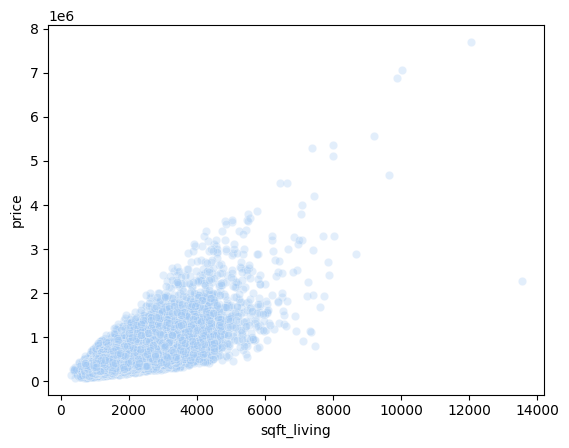

In [39]:
sns.scatterplot(data=data, x='sqft_living', y='price', alpha=0.3)

Действительно, в среднем с ростом sqft_living, цена тоже растет, маленькие дома(до 1500) стоят до 400k, а крупные(3000-5000) уже до 1 миллиона, а где-то и выше

<Axes: xlabel='sqft_lot', ylabel='price'>

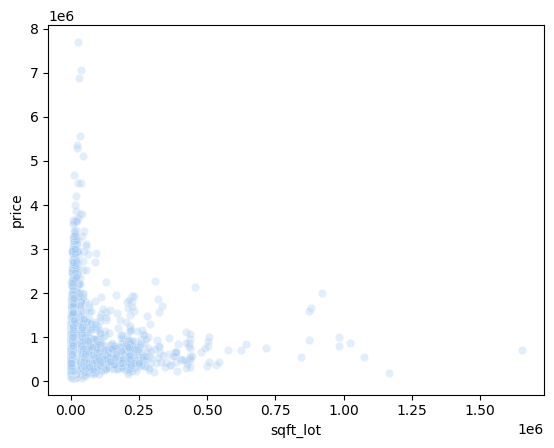

In [40]:
sns.scatterplot(data=data, x='sqft_lot', y='price', alpha=0.3)

<Axes: xlabel='sqft_lot', ylabel='price'>

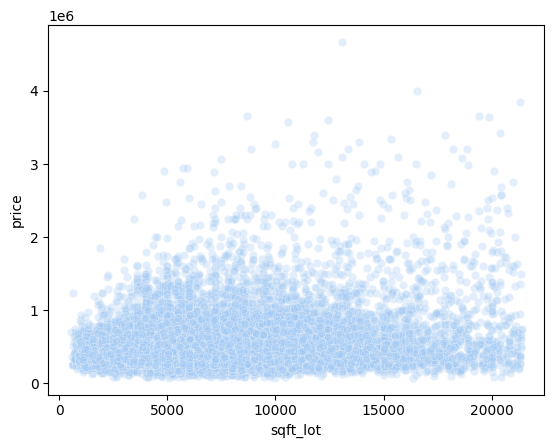

In [41]:
sns.scatterplot(data=data.query('sqft_lot < 21397'), x='sqft_lot', y='price', alpha=0.3)

При этом какой-то зависимости между ценой продажи дома и площадью участка трудно заметить

Для более быстрого построения тепловой карты, чтобы не писать вечно параметры графика, создам функцию

In [42]:
def make_heatmap(data):
    sns.heatmap(data=data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

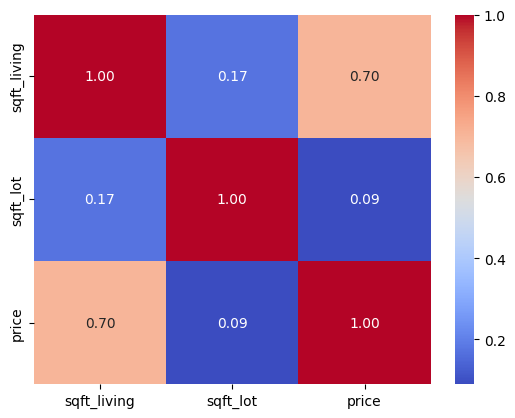

In [43]:
make_heatmap(data[['sqft_living', 'sqft_lot', 'price']])

* И да, оказалось, что между sqft_living и price есть очень сильная положительная связь
* При этом связь между размером участка и ценой крайне низкая и почти не влияет
* Напрямую sqft_lot вряд ли будет использоваться, только дополнительные смежные признаки

### Дома в округе

Идея этих фич в том, чтобы захватить локальный контекст: уровень плотности застройки и типичные размеры домов и участков в окрестностях
* Если средняя жилая площадь соседних 15 домов (sqft_living15) высока, то этот район, вероятно, более престижный и цены на ваш дом тоже будут выше
* Более плотная застройка, т.е. меньшие значения sqft_lot15 могут указывать на локацию с ограниченным пространством, где цена обычно выше
* Сравнение с конкурентами, отношение площади вашего дома к домам рядом показывает, насколько дома выигрывает по сравнению с соседями и может дать бонус к цене
* Если размер участка велик и при этом велик и sqft_lot15, вероятно, что дом может стоить дороже, из-за большего пространства и некой приватности

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_living15', ylabel='Count'>

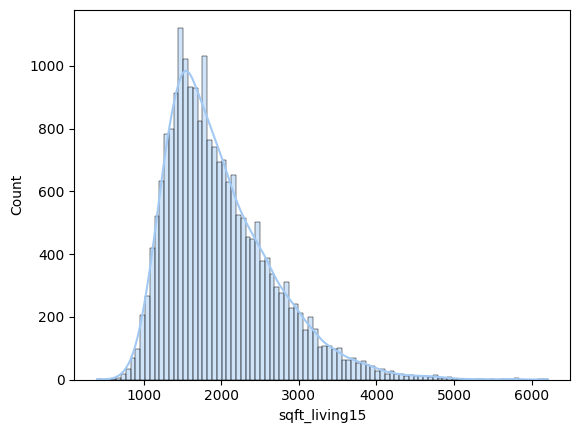

In [44]:
sns.histplot(data=data, x='sqft_living15', kde=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_lot15', ylabel='Count'>

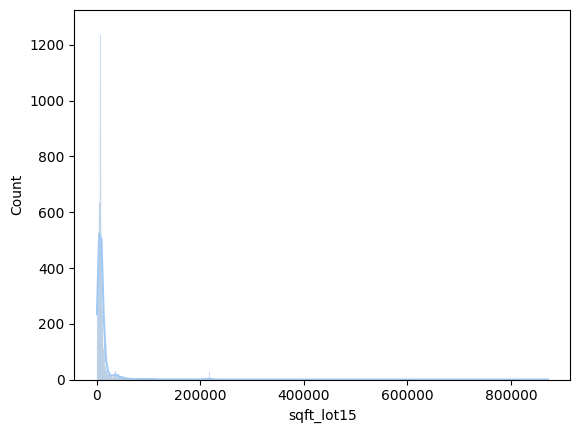

In [45]:
sns.histplot(data=data, x='sqft_lot15',   kde=True)

Распределение графиков крайне похоже на распределение обычных фич sqft_living и sqft_lot

<Axes: xlabel='sqft_living15', ylabel='price'>

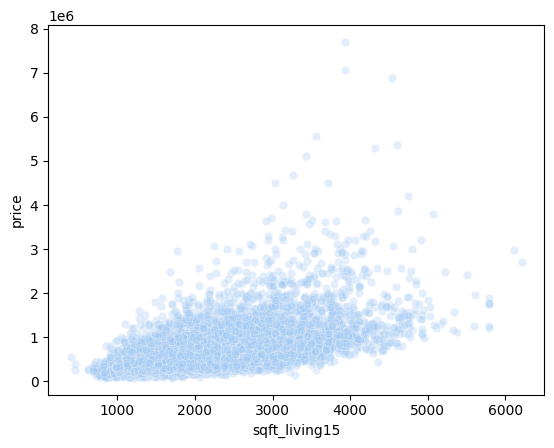

In [46]:
sns.scatterplot(data=data, x='sqft_living15', y='price', alpha=0.3)

При этом по графику зависимости sqft_living15 и price уже нельзя так точно утверждать о наличии явной зависимости между переменными

<Axes: xlabel='sqft_lot15', ylabel='price'>

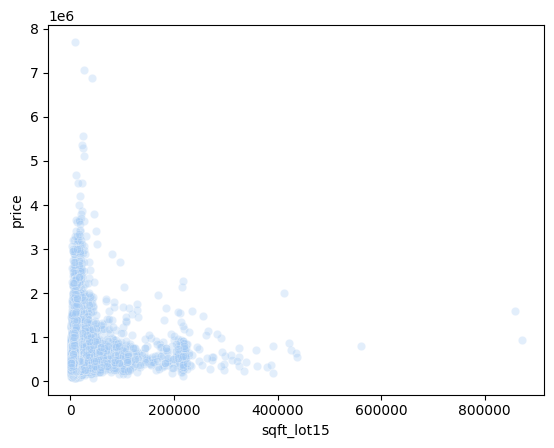

In [47]:
sns.scatterplot(data=data, x='sqft_lot15',    y='price', alpha=0.3)

График выше тоже не говорит о какой-либо зависимости

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='bin_living15', ylabel='price'>

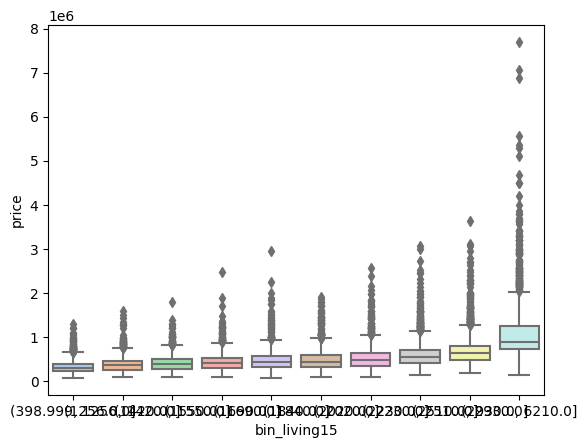

In [48]:
data['bin_living15'] = pd.qcut(data['sqft_living15'], 10)
sns.boxplot(data=data, x='bin_living15', y='price')

По боксплотам заметны выбросы в каждой из категорий, при этом видно, как цена постепенно растет с увеличением площади домов рядом

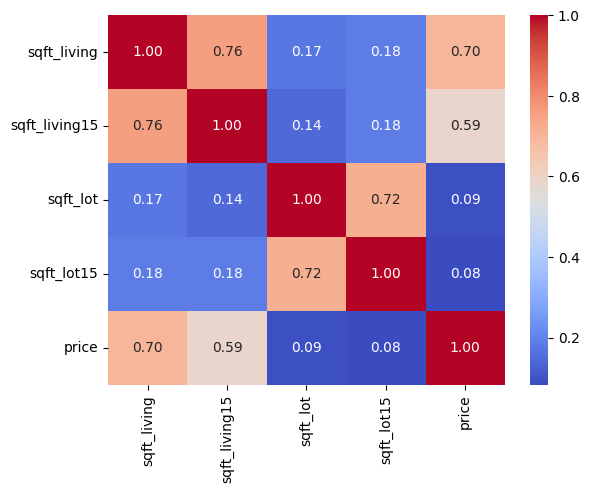

In [49]:
make_heatmap(data[['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'price']])

* 1 гипотеза о престижности района оправдалась. Если дома рядом с большей площадью,то цена и на ваш дом выше
* 2 гипотез не оправдалась, плотность застройки не повлияла на цену

Для еще двух гипотез создадим два признака:
* соотношение площади дома к площади домов в округе
* соотношение площади участка к площади учатсков в округе

In [50]:
data['living_ratio'] = data['sqft_living'] / data['sqft_living15']
data['lot_ratio'] = data['sqft_lot'] / data['sqft_lot15']

<Axes: xlabel='living_ratio', ylabel='price'>

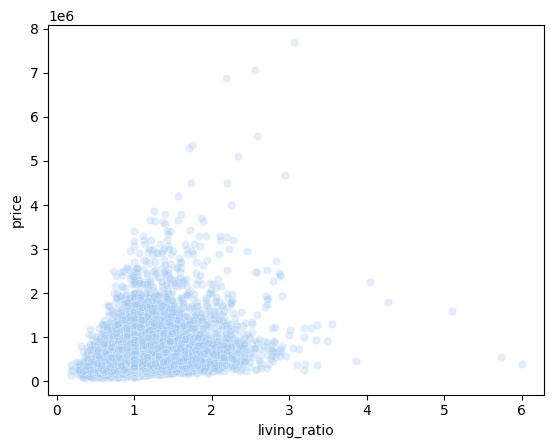

In [51]:
sns.scatterplot(data=data, x='living_ratio', y='price', alpha=0.3)

<Axes: xlabel='lot_ratio', ylabel='price'>

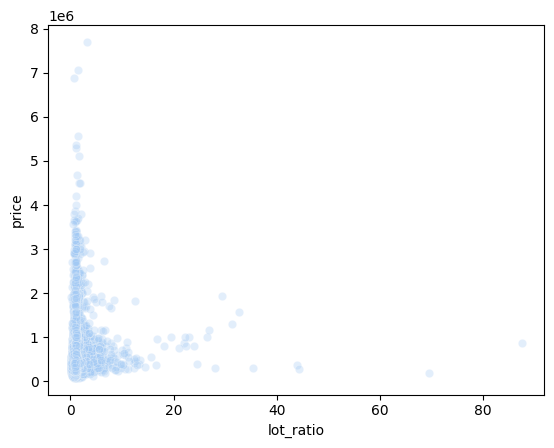

In [52]:
sns.scatterplot(data=data, x='lot_ratio',    y='price', alpha=0.3)

Зависимость living_ratio и цены есть, при этом lot_ratio не показал себя хорошо

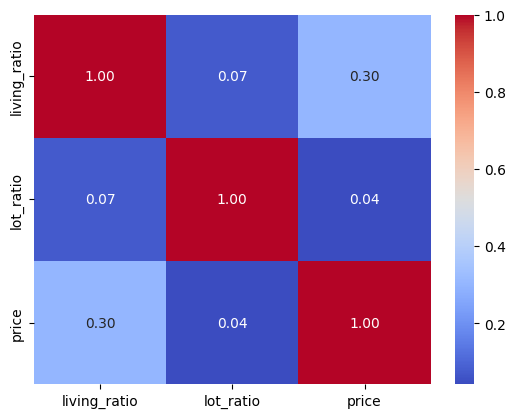

In [53]:
make_heatmap(data[['living_ratio', 'lot_ratio', 'price']])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='living_ratio', ylabel='Count'>

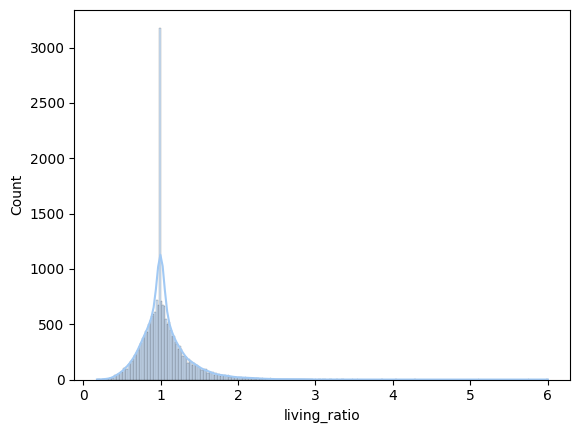

In [54]:
sns.histplot(data=data, x='living_ratio', kde=True)

* Корреляция получилась средней, 0.3. Зависимость есть, но отдельный признак sqft_living приносил больше информации
* По распределению видно, что большинство домов имеют жилую площадь примерно равную среднему по 15 соседям, т.к. коэффициент равен 1
* Видно, что график чуть смещен вправо, то есть иногда встречаются большие дома, сильно выделяющиеся на фоне окружения, что иногда влияет и на цену

### Площадь с подвалом и без

* Основная площадь выше земли будет сильнее влиять на цену, чем площадь цокольного этажа
* Отношение подвала к общей площади может влиять на цену. Если коэффициент будет высокий, это говорит о доме, где подвал занимает слишком много места

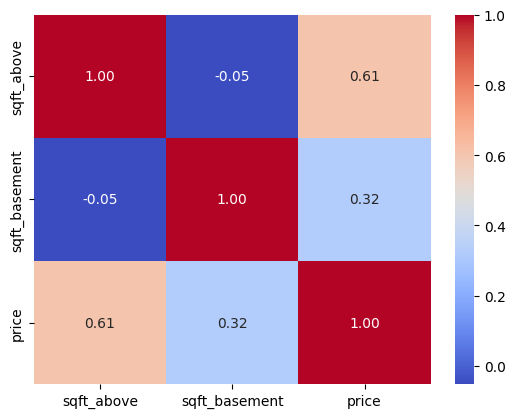

In [55]:
make_heatmap(data[['sqft_above', 'sqft_basement', 'price']])

Первая гипотеза подтвердилась, хоть и была очевидна. Корреляция присутствует и у подвала, и у чистой площади, но вторая влияет больше

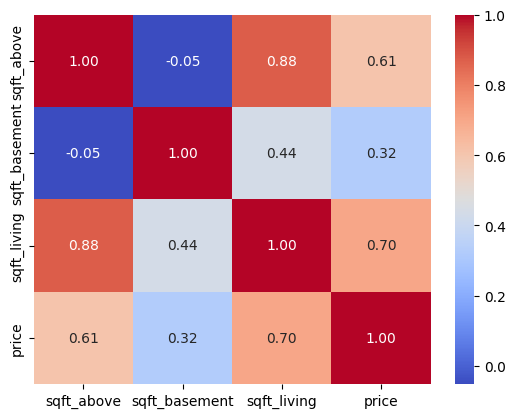

In [56]:
make_heatmap(data[['sqft_above', 'sqft_basement', 'sqft_living','price']])

При этом вряд ли параметры будут помощниками, ведь они сильно коррелируют с sqft_living, что логично. Отдельно их использовать не стоит

In [57]:
data['basement_ratio'] = data['sqft_basement'] / data['sqft_above'].replace(0, np.nan)

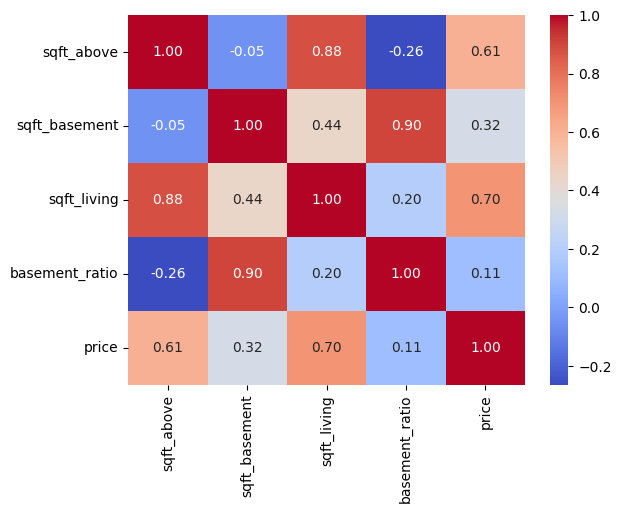

In [58]:
make_heatmap(data[['sqft_above', 'sqft_basement', 'sqft_living', 'basement_ratio','price']])

Корреляция оказалась крайне невысокой

<Axes: xlabel='has_basement', ylabel='price'>

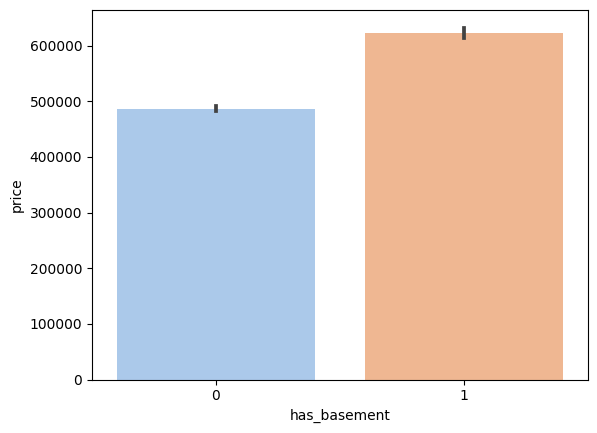

In [59]:
data['has_basement'] = np.where(data['sqft_basement'] > 0, 1, 0)
sns.barplot(data=data, x='has_basement', y='price')

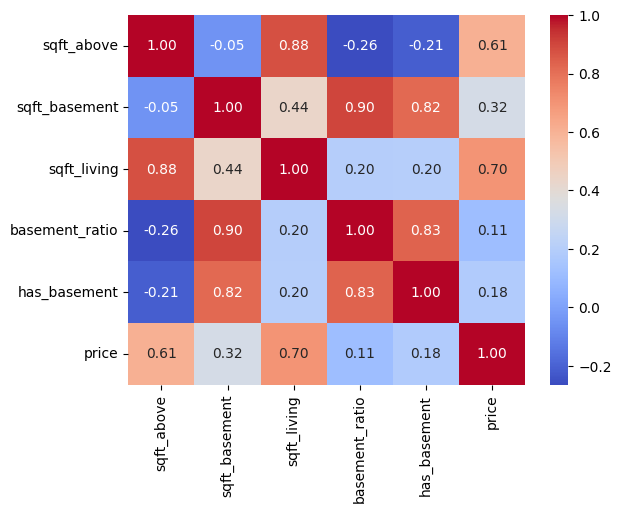

In [60]:
make_heatmap(data[['sqft_above', 'sqft_basement', 'sqft_living', 'basement_ratio', 'has_basement', 'price']])

При этом наличие подвала уже влияет больше. Если площадь ненулевая, то это дает прирост к цене

## Географические характеристики

Как мы знаем по задаче, мы находимся в округе Кинг, посмотрев на карту можно увидеть, что есть район, находящийся ближе к воде(западнее) и ближе к Сиэтлу, будет более престижный, чем районы восточнее. Можно предположить, что на цену будет влиять широта расположения дома, проверим ниже

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Map_of_Washington_highlighting_King_County.svg/330px-Map_of_Washington_highlighting_King_County.svg.png)

In [61]:
len(data['lat'].unique())

5034

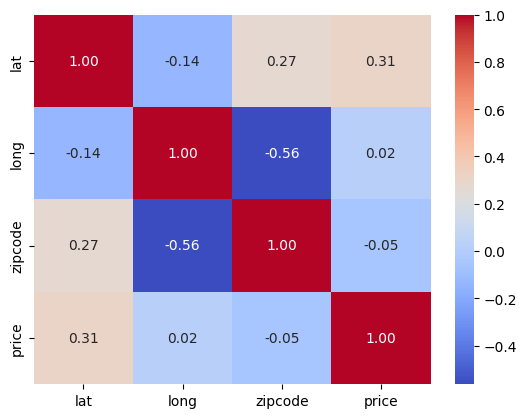

In [62]:
make_heatmap(data[['lat', 'long', 'zipcode', 'price']])

Видим, что корреляция и правда довольно неплохая у показателя широты, а долгота никак не влияет. Так же как и не влияет почтовый индекс, и тем более он сильно коррелиует с long и lat, так что уберем его позже

In [63]:
from sklearn.cluster import KMeans
coords = data[['lat','long']]
km = KMeans(n_clusters=4, random_state=42).fit(coords)
data['region'] = km.labels_.astype(str)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='region', ylabel='price'>

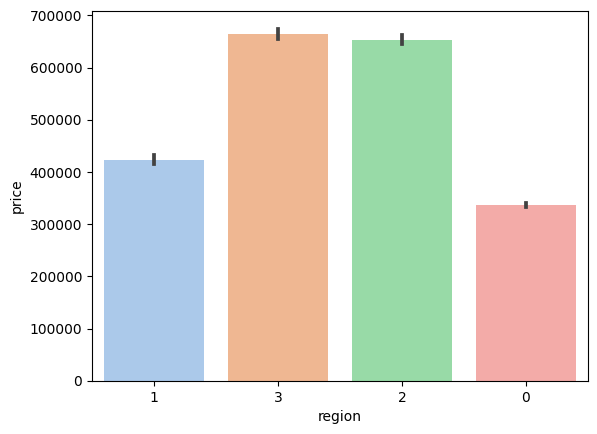

In [64]:
sns.barplot(x='region', y='price', data=data)

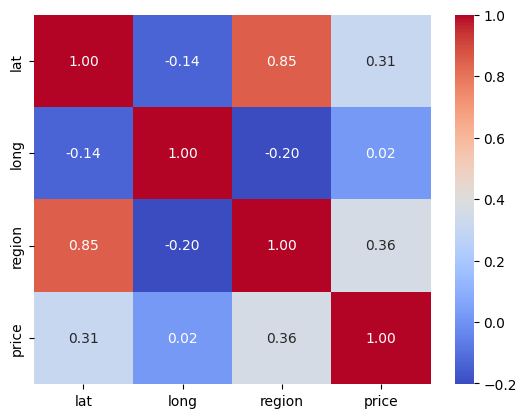

In [65]:
make_heatmap(data[['lat', 'long', 'region', 'price']])

Таким образом географическое положение оказывает влияние на цену дома, при этом широта тут важнее, чем долгота

## Количество спален и ванных комнат

* Цена должна расти с числом спален, но вряд ли количество спален от 5 ценится, за это прирост будет уже меньше, чем увеличение от 2 до 3 например
* Если ванной комнаты больше 1, то это повлияет на цену сильнее, чем апгрейд с 3 до 4

<Axes: xlabel='bedrooms', ylabel='count'>

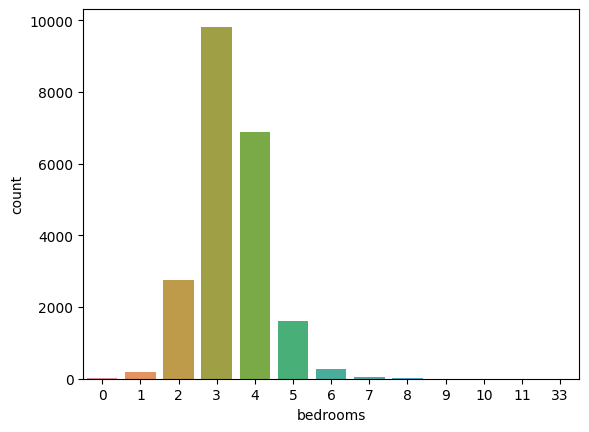

In [66]:
sns.countplot(data=data, x='bedrooms')

Во всех домах чаще встречаются 3 спальни, иногда 4, остальные встречаются реже. Наблюдаем и интересный артефакт с 33 спальнями..

<Axes: xlabel='bedrooms', ylabel='price'>

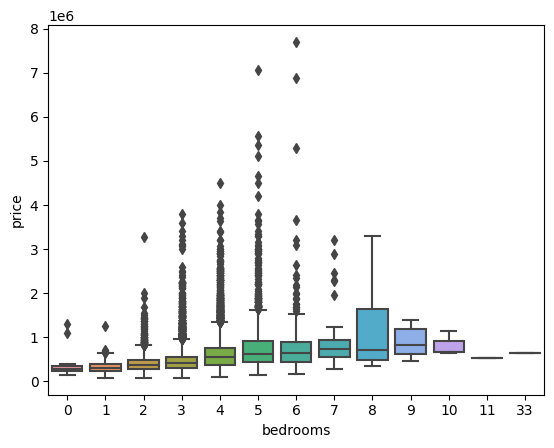

In [67]:
sns.boxplot(data=data, x='bedrooms', y='price')

Видим достаточно выбросов

In [68]:
stats_bed = data.groupby('bedrooms')['price'] \
                .agg(['count','mean','median']) \
                .reset_index()
stats_bed

,bedrooms,count,mean,median
0,0,13,4.095038e+05,288000.0
1,1,199,3.176429e+05,299000.0
2,2,2760,4.013727e+05,374000.0
3,3,9824,4.662321e+05,413000.0
4,4,6882,6.354195e+05,549997.5
5,5,1601,7.865998e+05,620000.0
6,6,272,8.255206e+05,650000.0
7,7,38,9.511847e+05,728580.0
8,8,13,1.105077e+06,700000.0
9,9,6,8.939998e+05,817000.0


<Axes: xlabel='bedrooms', ylabel='price'>

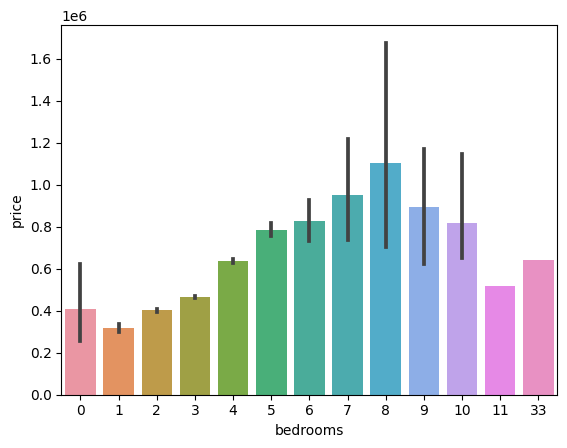

In [69]:
sns.barplot(x='bedrooms', y='price', data=data)

Тут же можно увидеть среднюю цену, которая снижается после 8 спален

<Axes: xlabel='bathrooms', ylabel='count'>

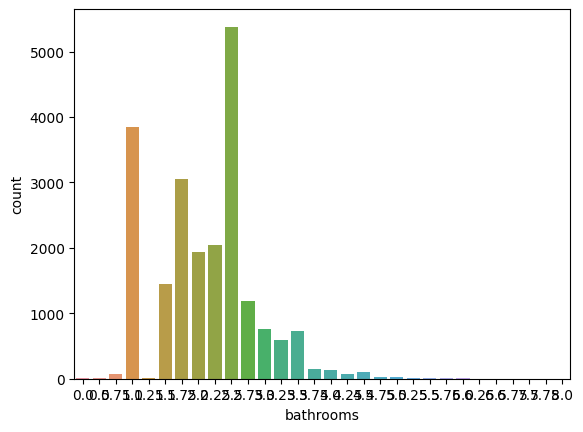

In [70]:
sns.countplot(data=data, x='bathrooms')

In [71]:
data['bathrooms'].value_counts()

bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

<Axes: xlabel='bathrooms', ylabel='price'>

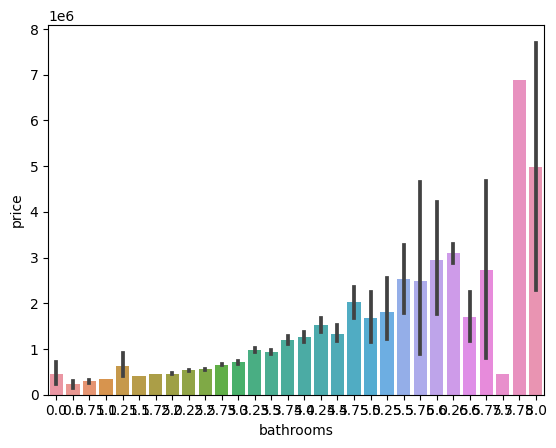

In [72]:
sns.barplot(x='bathrooms', y='price', data=data)

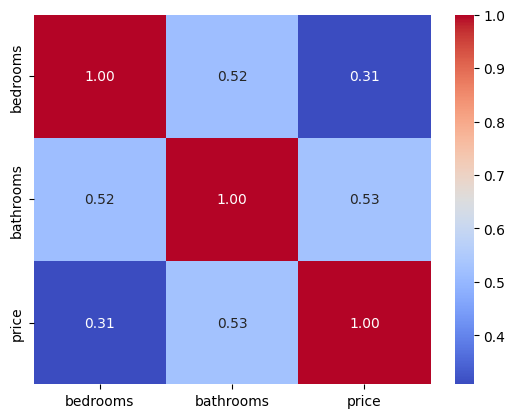

In [73]:
make_heatmap(data[['bedrooms', 'bathrooms', 'price']])

Корреляция показывает довольно сильное влияение ванных комнат и спален на цену

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedrooms', ylabel='price'>

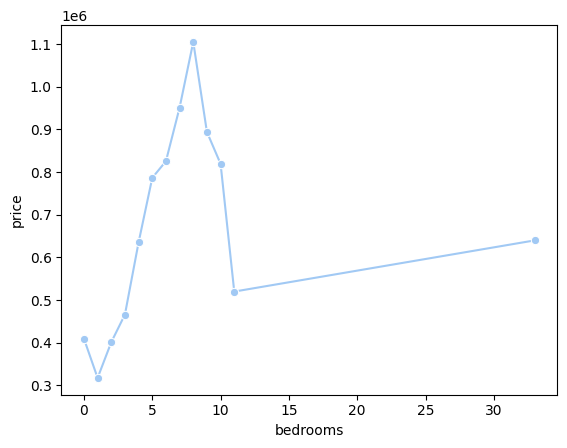

In [74]:
bed_stats = data.groupby('bedrooms')['price'].mean().reset_index()
bed_stats['delta'] = bed_stats['price'].diff()
sns.lineplot(data=bed_stats, x='bedrooms', y='price', marker='o')

При этом, если построить график, который отражает прирост в количестве комнат и разницу в цене, то бдудет видно, что цена стремительно растет до 5 комнат, так же есть пик на 8,затем вновь снижение

<Axes: xlabel='bedrooms', ylabel='delta'>

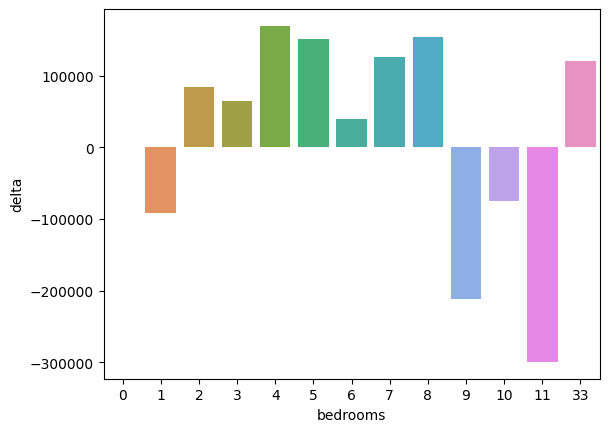

In [75]:
sns.barplot(data=bed_stats, x='bedrooms', y='delta')

<Axes: xlabel='bath_group', ylabel='price'>

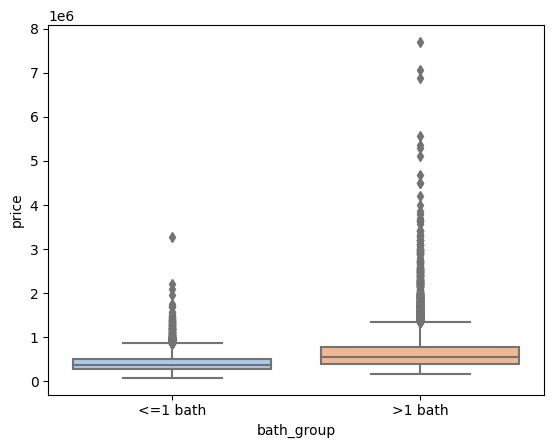

In [76]:
data['bath_group'] = np.where(data['bathrooms'] > 2, '>1 bath', '<=1 bath')
sns.boxplot(data=data, x='bath_group', y='price')

Построим общий признак total_rooms

<Axes: xlabel='total_rooms', ylabel='price'>

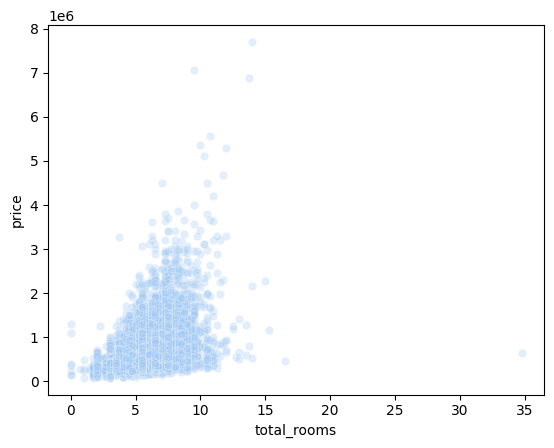

In [77]:
data['total_rooms'] = data['bedrooms'] + data['bathrooms']
sns.scatterplot(data=data, x='total_rooms', y='price', alpha=0.3)

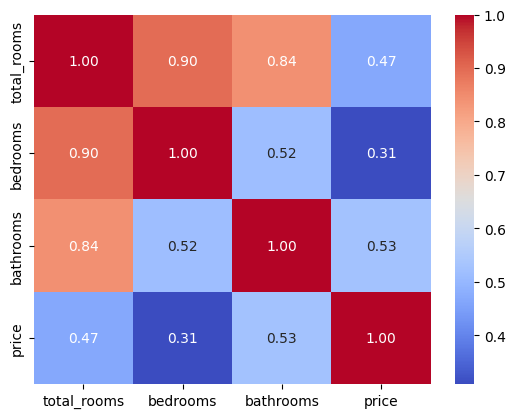

In [78]:
make_heatmap(data[['total_rooms', 'bedrooms', 'bathrooms', 'price']])

Как видно, он имеет лучшую корреляцию, чем bedrooms, но! не дотягивает до bathrooms, и при этом, почти полностью повторяет данные bedrooms и bathrooms, имея корреляцию с ними 0.84 и 0.9 соответственно

## Этажность

Дома с 1-2 этажами будут более востребованны, не всегда 3+ этажа будут лучше, ведь часто это обусловлено внешними факторами постройки и спецификой района

<Axes: xlabel='floors', ylabel='count'>

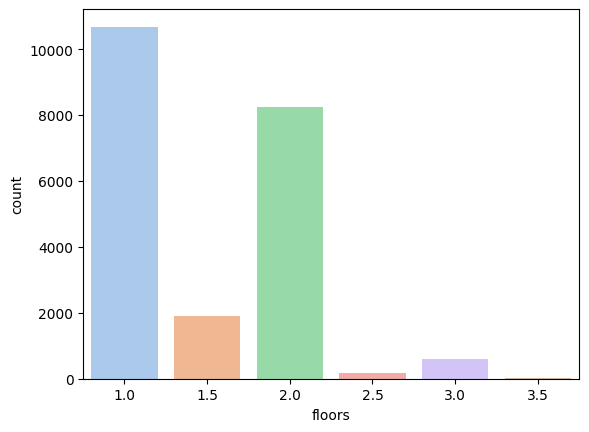

In [79]:
sns.countplot(data=data, x='floors')

Большая часть домов – одноэтажные и двухэтажные, остальные встречаются заметно реже

<Axes: xlabel='floors', ylabel='price'>

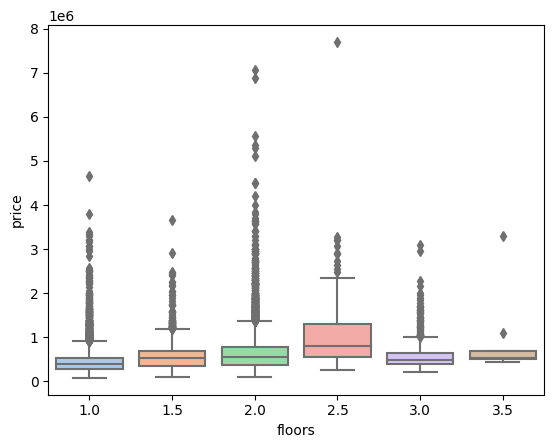

In [80]:
sns.boxplot(data=data, x='floors', y='price')

Итого оказалось, что дома 1.5 и 2-этажные ценятся чуть больше, чем одноэтажные, при этом по количеству их не сильно меньше в совокупности, второй этаж будет плюсом зачастую. Еще больше стоят 2.5 этажные дома, но их крайне мало, а остальные не пользуются популярностью

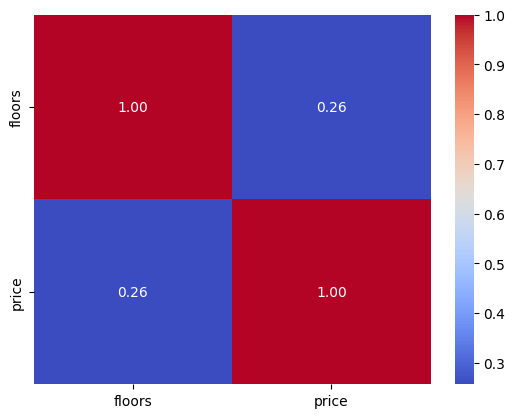

In [81]:
make_heatmap(data[['floors', 'price']])

Характеристика в итоге оказалась не самая важная, тут нет большой вариативности, а дома абсолютно разной этажности могут одинаково дорого стоить, в зависимости от того, что внутри

## Waterfront

Береговая линия явно повысит стоимость дома, другой вопрос, так ли много таких домов?

<Axes: xlabel='waterfront', ylabel='count'>

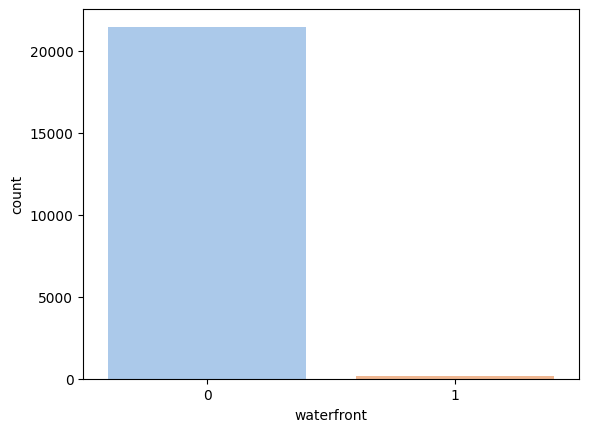

In [82]:
sns.countplot(data=data, x='waterfront')

In [83]:
data['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

<Axes: xlabel='waterfront', ylabel='price'>

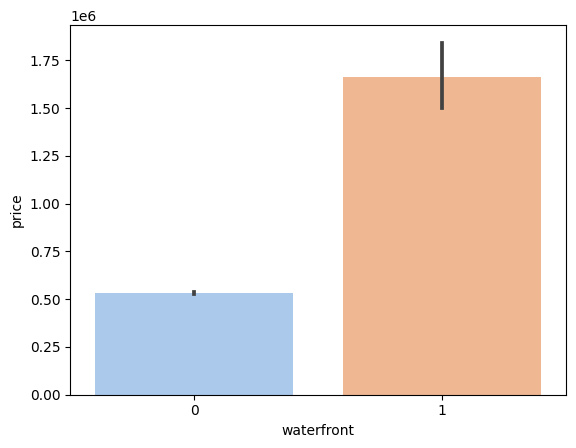

In [84]:
sns.barplot(data=data, x='waterfront', y='price')

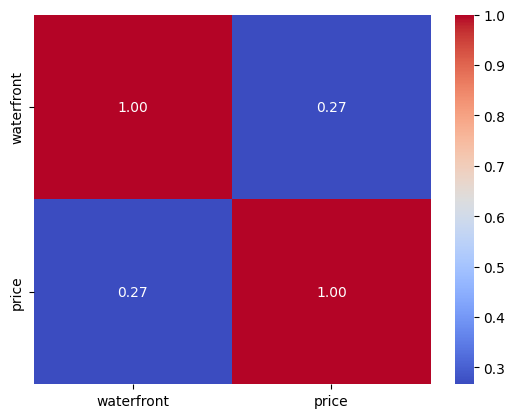

In [85]:
make_heatmap(data[['waterfront', 'price']])

Корреляция показателя неплохая, но не сильно высокая, при этом данный показатель есть у совсем малого числа домов

## Годы постройки и ремонта

Дома новее будут стоить дороже, а отремонтированные недавно дома также будут стоить больше

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='yr_built', ylabel='Count'>

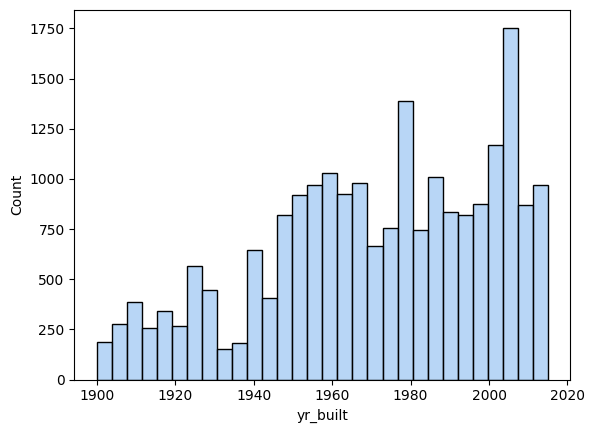

In [86]:
sns.histplot(data=data, x='yr_built', bins=30, kde=False)

Постепенно количество построенных домов с каждым годом росло, были скачки в 80-е и 00-е годы. Значит, что весь датасет содержит почти вековой диапазон, и сам год мало что расскажет нам

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='yr_renovated', ylabel='Count'>

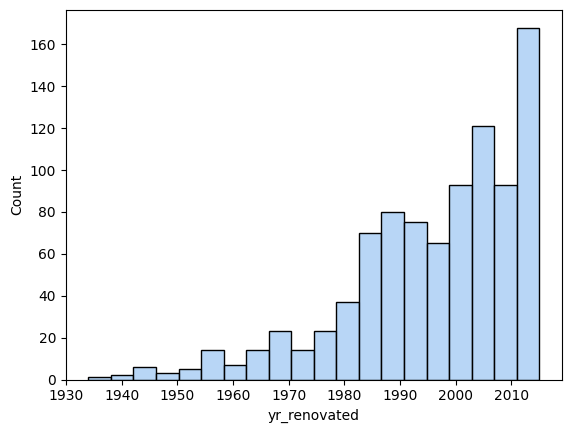

In [87]:
sns.histplot(data=data[data['yr_renovated']>0], x='yr_renovated', bins=20, kde=False)

Число ремонтов растет год от году, и это будет влиять сильнее, чем сам год постройки

Введем новые фичи, чтобы узнать, насколько давно дом был построен/насколько давно был ремонт

In [88]:
data['sale_year'] = df['date'].dt.year
data['house_age'] = data['sale_year'] - data['yr_built']
data['is_renovated'] = (data['yr_renovated'] > 0)
data['years_since_renov'] = np.where(data['yr_renovated']>0,
                                     data['sale_year'] - data['yr_renovated'],
                                     np.nan)

<Axes: xlabel='yr_built', ylabel='price'>

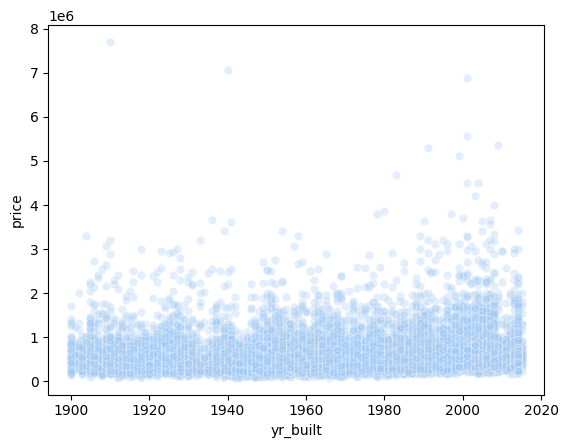

In [89]:
sns.scatterplot(data=data, x='yr_built', y='price', alpha=0.3)

<Axes: xlabel='house_age', ylabel='price'>

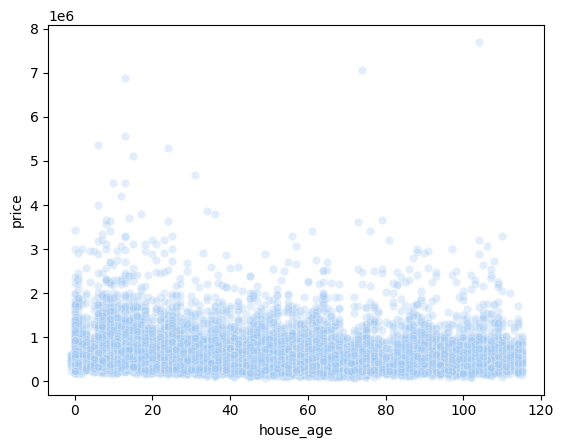

In [90]:
sns.scatterplot(data=data, x='house_age', y='price', alpha=0.3)

По графикам выше зависимость не прослеживается

Посмотрим, насколько сильно влияет наличие ремонта в доме

<Axes: xlabel='is_renovated', ylabel='count'>

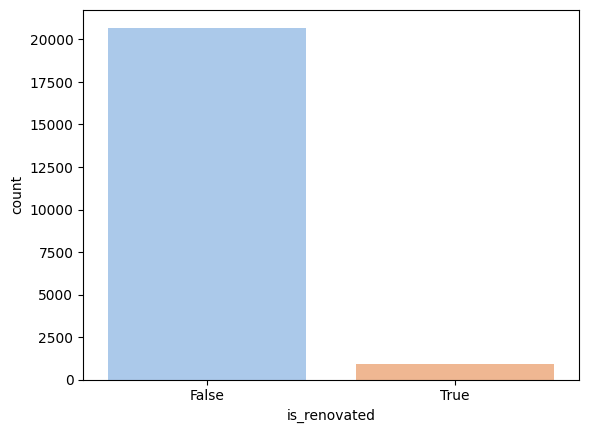

In [91]:
sns.countplot(data=data, x='is_renovated')

<Axes: xlabel='is_renovated', ylabel='price'>

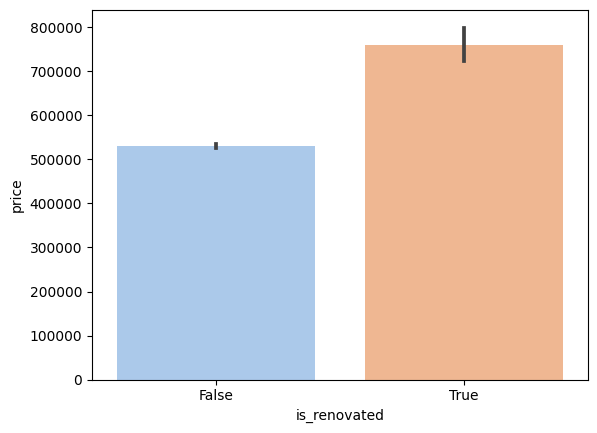

In [92]:
sns.barplot(data=data, x='is_renovated', y='price')

И да, влияет очень сильно, дома, в которых был ремонт стоят значительно дороже в среднем

<Axes: xlabel='years_since_renov', ylabel='price'>

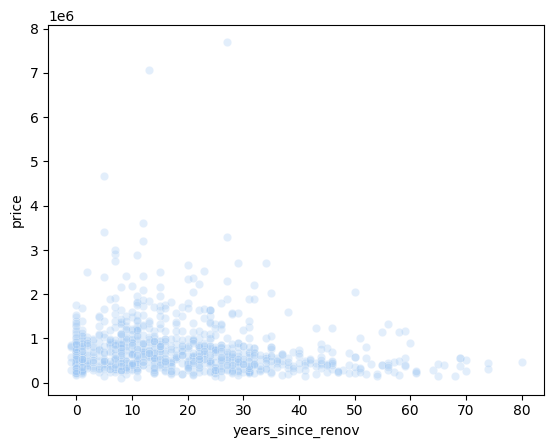

In [93]:
sns.scatterplot(data=data, x='years_since_renov', y='price', alpha=0.3)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


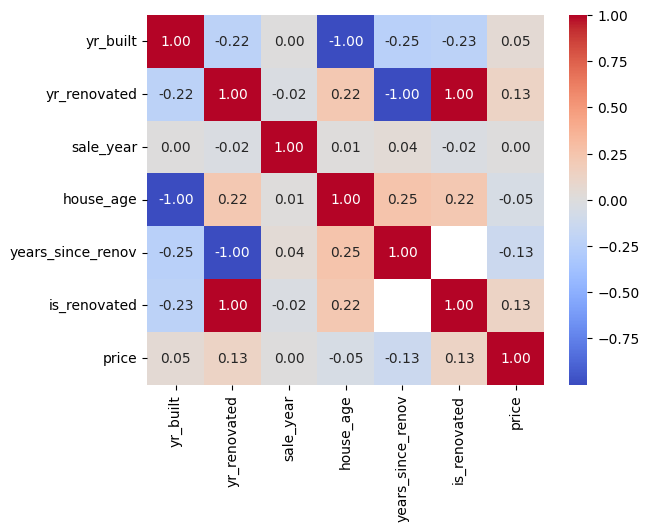

In [94]:
make_heatmap(data[['yr_built', 'yr_renovated', 'sale_year', 'house_age', 'years_since_renov', 'is_renovated', 'price']])

Как итог, сырые yr_built и sale_year(очевидно) не влияют на таргет никак. При этом ремонт дома влияет уже сильнее, нам важна и свежесть ремонта и факт того, был он или нет. В итоге оставим часть переменных из этих, это будет один из признаков, yr_renovated или же is_renovated, в зависимости от показателей моделей

## Рейтинг дома: вид, состояние, грейд
Тут должно быть все просто, чем рейтинг лучше, тем дом дороже, но может будут и сюрпризы

<Axes: xlabel='view', ylabel='price'>

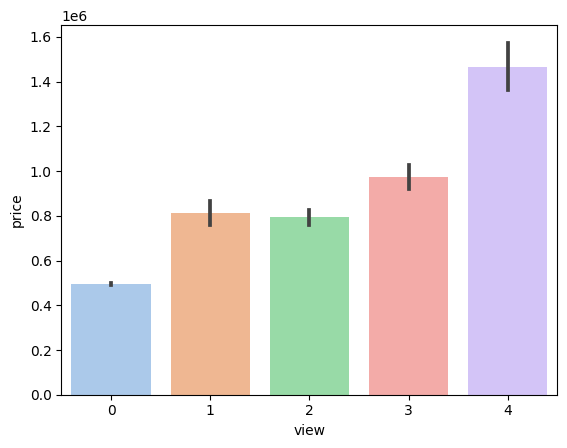

In [95]:
sns.barplot(data=data, x='view', y='price')

<Axes: xlabel='condition', ylabel='price'>

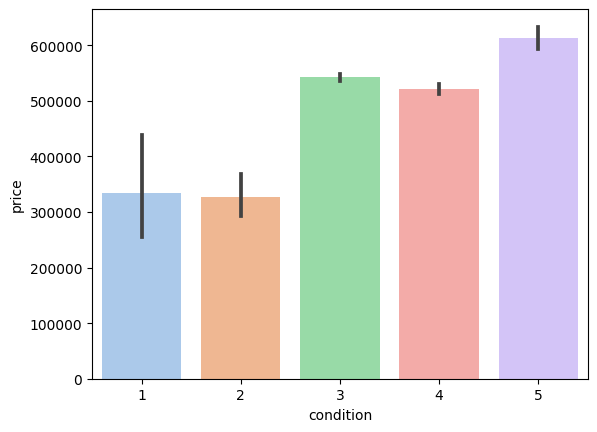

In [96]:
sns.barplot(data=data, x='condition', y='price')

Тут мы замечаем большое количество выбросов в состоянии дома 1 и 2, есть много примеров домов, когда не в самом лучшем состоянии дом продается дорого в силу других положительных факторов

<Axes: xlabel='grade', ylabel='price'>

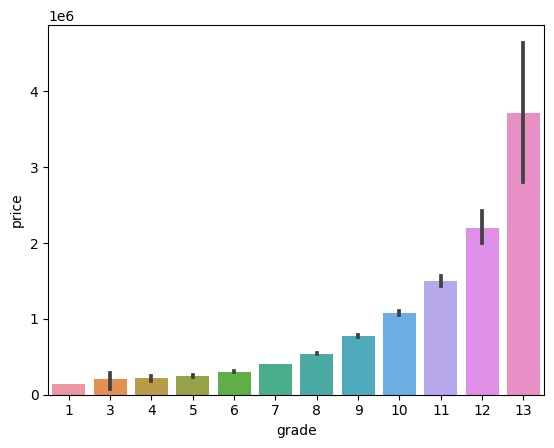

In [97]:
sns.barplot(data=data, x='grade', y='price')

Что и следовало ожидать, чем лучше оценка в каждом из показателей, тем дороже будет стоить дом. Есть небольшие погрешности, но общая картина именно такая

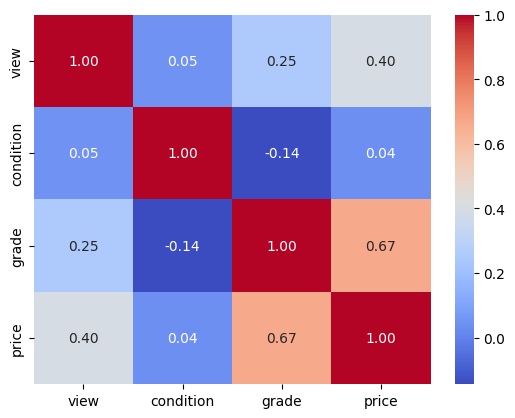

In [98]:
make_heatmap(data[['view', 'condition', 'grade', 'price']])

Как мы видим, вид действительно влияет на цену сильно, про грейд и говорить нечего, тут было очевидно. А вот condition оказался слабым признаком

# Выводы из EDA

In [99]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.drop('price')
corr_ser = data[numeric_cols].corrwith(data['price'])

corr_df = pd.DataFrame({
    'feature': corr_ser.index,
    'corr':    corr_ser.values,
    'abs_corr': corr_ser.abs().values
})
corr_df = corr_df.sort_values('abs_corr', ascending=False).reset_index(drop=True)
corr_df

,feature,corr,abs_corr
0,sqft_living,0.702035,0.702035
1,grade,0.667434,0.667434
2,sqft_above,0.605567,0.605567
3,sqft_living15,0.585379,0.585379
4,bathrooms,0.525138,0.525138
5,total_rooms,0.466319,0.466319
6,view,0.397293,0.397293
7,sqft_basement,0.323816,0.323816
8,bedrooms,0.308350,0.308350
9,lat,0.307003,0.307003


## Выводы по изначальным фичам

1. sqft_living (r = 0.702)
Самый сильный количественный предиктор цены. Рост жилой площади объясняет порядка 49% (0.7^2) дисперсии цены

2. grade (r = 0.667)

Оценка качества/дизайна здания почти так же важна, как площадь. Премия за элитные уровни (10–13) особенно велика.

3. sqft_above (r = 0.606)

Площадь надземной части сильно коррелирует с ценой, но дублирует sqft_living (r=0.88).

4. sqft_living15 (r = 0.585)

Средняя площадь соседей даёт заметный сигнал о районе и домах вокруг, но слабее собственной жилой площади.

5. bathrooms (r = 0.525)

Количество ванных комнат — важный признак, чуть сильнее, чем число спален.

6. view (r = 0.397)

Рейтинг вида (0–4) даёт среднюю корреляцию. Особенно ценятся топ‑уровни (4).

7. sqft_basement (r = 0.324)

Площадь подвала влияет на цену умеренно, при этом флаг has_basement оказался более простым решением.

8. bedrooms (r = 0.308)

Число спален влияет на цену продажи. При увеличении числа спален до 8, происходит заметный рост.

10. lat (r = 0.307)

Широта влияет сильно, т.к. показывает, западнее или восточнее находится дом. На западе – ближе к воде и административному центру округа – Сиэтлу

11. waterfront (r = 0.266)

Хотя корреляция невысока, наличие вида на воду даёт прирост.

12. floors (r = 0.257)

Этажность важна: пиковая ценность у домов с 2–2.5 этажами.

13. yr_renovated (r = 0.126)

Сам год ремонта оказался не так важен

14. sqft_lot (r = 0.090) и sqft_lot15 (r = 0.082)

Размер участка и его среднее по округе почти не влияют на цену.

15. yr_built (r = 0.054)

Год постройки не помогает описать цену

16. zipcode (r = -0.053)

Почтовый индекс сам по себе не информативен

Остальные признаки (long, condition, lot_ratio, sale_year..) имеют корреляции ниже 0.05 и малоинформативны.

## Выводы по новым фичам – этап Feature Engineering, который проходил в EDA

1. total_rooms (r = 0.466)

Сумма спален и ванных комнат. Коррелирует сильнее всех новых, но почти полностью дублирует информацию о bedrooms и bathrooms.

2. region (r = 0.360)

Кластеризация по координатам. Дает более мощный географический сигнал, чем сырые lat/long.

3. living_ratio (r = 0.302)

Отношение sqft_living / sqft_living15, показывает, насколько дом выделяется объемом жилой площади среди соседей.

4. has_basement (r = 0.180)

Бинарный признак наличия подвала, относительно полезен.

5. years_since_renov (r = -0.128)

Лет с момента последнего ремонта. Отрицательная корреляция отражает: чем свежее ремонт, тем дороже дом.

6. is_renovated (r = 0.126)

Бинарный признак ремонта (yr_renovated > 0), дает небольшую корреляцию

7. basement_ratio (r = 0.114)

Отношение sqft_basement / sqft_above. Признак слишком слабый.

8. lot_ratio (r = 0.042)

Отношение sqft_lot / sqft_lot15. Минимальная польза, как и вообще от показателя площади участка.

9. month_cos (r = -0.031)

Косинус от месяца. Сезонная компонента.

Фичи ниже скорее были вспомогательными, чтобы заменить date, но все же корреляцию посчитали:

10. sale_day (r = -0.015)

День месяца продажи.

11. sale_month (r = -0.010)

Месяц продажи.

12. month_sin (r = 0.010)

Синус от месяца. Еще хуже косинуса.

13. sale_quarter (r = -0.009)

Квартал продажи. Эффекта нет.

14. is_weekend (r = 0.005)

Попадает ли продажа на выходной. Признак тоже бесполезный.

15. sale_weekday (r = -0.002)

День недели. Неинформативен.

# Первичное тестирование модели

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from tensorflow import keras

feats = [
    'sqft_living','grade','sqft_above','sqft_living15',
    'bathrooms','view','living_ratio','years_since_renov',
    'bedrooms','floors','condition',
    'waterfront','has_basement','is_renovated','region'
]

X1 = data[feats].copy()
y = data['price'].values
X1 = pd.get_dummies(X1, columns=['region'], drop_first=True)
X1['years_since_renov'] = X1['years_since_renov'].fillna(X1['years_since_renov'].max())

2025-07-06 08:36:21.471401: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751790981.766859      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751790981.841748      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [101]:
X1.isna().sum()

sqft_living          0
grade                0
sqft_above           0
sqft_living15        0
bathrooms            0
view                 0
living_ratio         0
years_since_renov    0
bedrooms             0
floors               0
condition            0
waterfront           0
has_basement         0
is_renovated         0
region_1             0
region_2             0
region_3             0
dtype: int64

In [102]:
def test_neural_network(model, X, y, epochs=15, batch=32):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch,
        validation_split=0.2,
        verbose=0
    )
    
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss: {loss}")
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R2 Score: {r2:.2f}")
    
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

Первая модель – базовая нейронная сеть

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-06 08:36:40.907253: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Test Loss: 62467768320.0
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 173109.53
RMSE: 249935.54
MAPE: 35.60%
R2 Score: 0.59


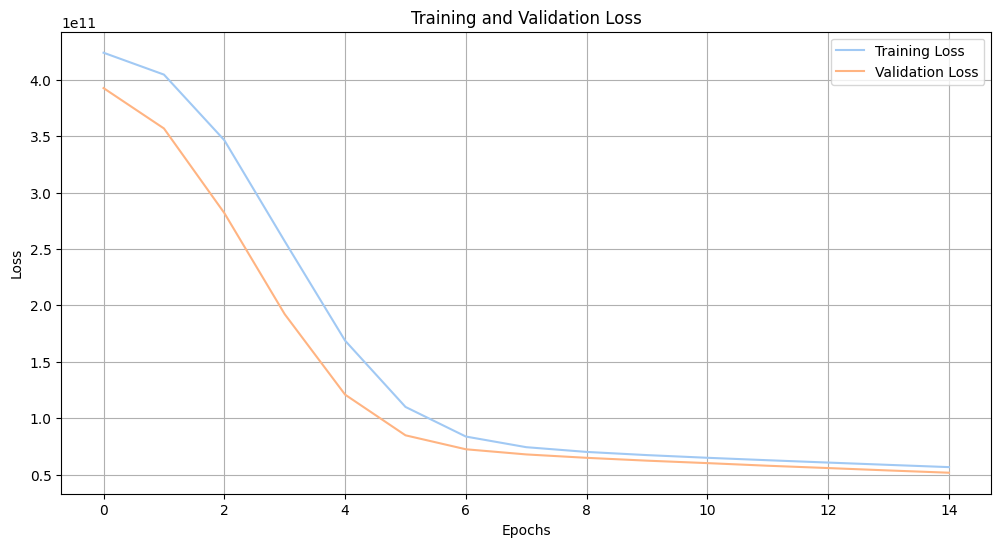

In [103]:
model1 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X1.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model1.compile(optimizer='adam', loss='mean_squared_error')
test_neural_network(model1, X1, y)

Результаты первой модели:
* MAE: 170294.68
* RMSE: 246590.15
* MAPE: 34.96%
* R2 Score: 0.60

Они максимально средние, еще есть над чем работать. Но график себя уже показывает с хорошей стороны, без переобучения, модель хорошо справляется

Сразу попробовал не выбирать лучшие фичи из выводов из аналитики и добавил все сразу

In [104]:
X2 = data.copy()
y = data['price'].values
X2 = pd.get_dummies(X2, columns=['region'], drop_first=True)
X2['years_since_renov'] = X2['years_since_renov'].fillna(X2['years_since_renov'].max())
X2 = X2.drop(columns=['price', 'id', 'date', 'bin_living15', 'bath_group'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 50007670784.0
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 148378.11
RMSE: 223623.95
MAPE: 29.30%
R2 Score: 0.67


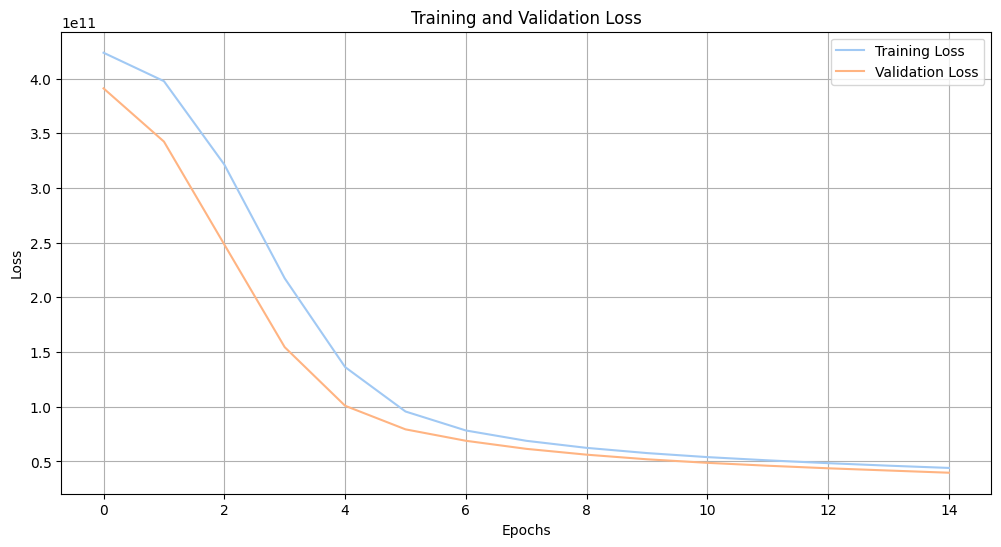

In [105]:
model2 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X2.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model2.compile(optimizer='adam', loss='mean_squared_error')
test_neural_network(model2, X2, y)

Результаты первой модели со всеми признаками, оказалось даже лучше
* MAE: 149786.49
* RMSE: 226150.62
* MAPE: 29.66%
* R2 Score: 0.66

# Доработка фич – Feature Engineering

Для сглаживания длинного хвоста используем логарифмическое преобразование, что позволит снизить эффект от выбросов

In [106]:
for col in ['sqft_living', 'sqft_above', 'sqft_lot', 'sqft_living15', 'sqft_lot15']:
    data[f'log1p_{col}'] = np.log1p(data[col])

Полиномиальные квадраты для улавливания нелинейных эффектов больших значений

In [107]:
data['sqft_living_sq'] = data['sqft_living'] ** 2 # квадрат жилой площади
data['grade_sq'] = data['grade'] ** 2 # квадрат grade — усиление отличий элитных домов
data['living_ratio_sq'] = data['living_ratio'] ** 2 # квадрат соотношения жилой площади к соседям

Взаимодействия для учёта совместных эффектов параметров

In [108]:
data['sqft_living_x_grade'] = data['sqft_living'] * data['grade']
# площадь * качество: ищем большие элитные дома

data['bathroom_x_bedroom'] = data['bathrooms'] * data['bedrooms']
# комбинирование количества ванных комнат и спален

data['floor_area_ratio'] = data['sqft_living'] / data['sqft_lot'].replace(0, np.nan)
# плотность застройки участка: сколько жилья на единицу земли

Доли спален и ванных комнат, чтобы понять баланс между спальнями и ванными

In [109]:
data['bedroom_ratio'] = np.where(
    data['total_rooms'] > 0,
    data['bedrooms'] / data['total_rooms'],
    0
)

data['bathroom_ratio'] = np.where(
    data['total_rooms'] > 0,
    data['bathrooms'] / data['total_rooms'],
    0
)

Также, как мы видели, расположение довольно сильно влияет на стоимость дома. И, как было выяснено, многое зависит от расположения на западе, возможно ближе к столице – Сиэтлу. Поэтому введем новую фичу, посчитав расстояние до центра от местоположения дома

In [110]:
center = (47.6076, -122.3369)
from haversine import haversine # посчитает расстояние между двумя точками по широте и долготе
data['dist_to_center'] = data.apply(
    lambda row: haversine((row['lat'], row['long']), center),
    axis=1
)

Добавим еще несколько фич, о которых я задумывался в ходе работы:

In [111]:
# 1. взаимодействие наличия выхода в воде и грейда, покажет очень крутые дома
data['waterfront_x_grade'] = data['waterfront'] * data['grade']

# 2. взвешенная площадь: 70% жилой + 30% участка
data['weighted_area'] = 0.7 * data['sqft_living'] + 0.3 * data['sqft_lot']

# 3. зимой было крайне мало продаж, превратим это в булевый признак
data['is_winter_sale'] = data['sale_month'].isin([12, 1, 2]).astype(int)

# 4. признак гигантского дома, чтобы сразу распознавать такие выбросы
threshold = data['sqft_living'].quantile(0.90)
data['is_huge'] = (data['sqft_living'] > threshold).astype(int)

# Тест модели с новыми фичами

In [112]:
X3 = data.copy()
X3 = pd.get_dummies(X3, columns=['region'], drop_first=True)
X3['years_since_renov'] = X3['years_since_renov'].fillna(X3['years_since_renov'].max())
X3 = X3.drop(columns=['price', 'id', 'date', 'bin_living15', 'bath_group'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 54809845760.0
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 166464.27
RMSE: 234115.02
MAPE: 35.37%
R2 Score: 0.64


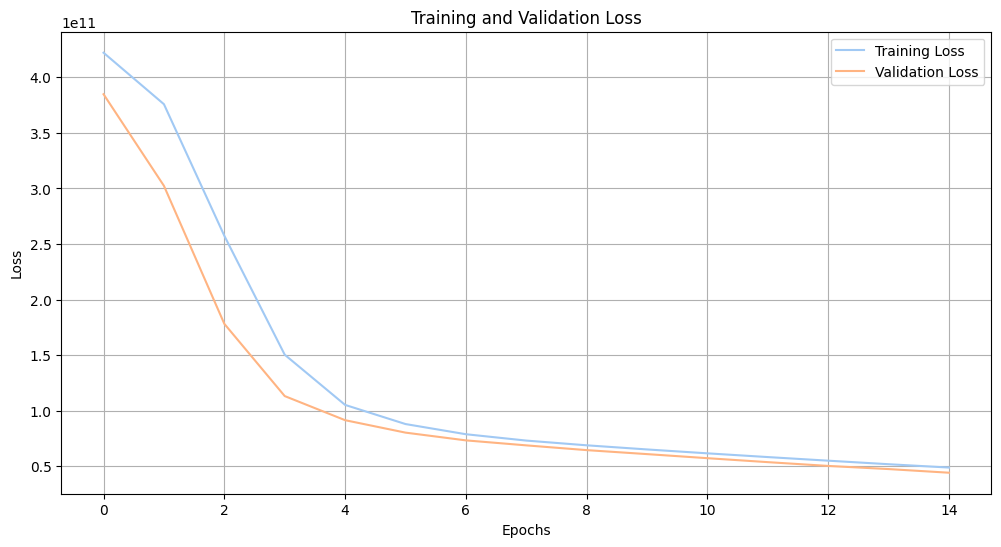

In [113]:
model3 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X3.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model3.compile(optimizer='adam', loss='mean_squared_error')
test_neural_network(model3, X3, y)

После добавления новых фич, результаты стали лучше, чем в первой модели, но хуже, чем во второй. Теперь определимся с тем, какие фичи стоит оставить, а что можно убрать

Оценим все фичи через permutation importance и RFE

# Permutation Importance

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


433/433 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 423180926976.0000 - val_loss: 384280920064.0000
Epoch 2/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 389985959936.0000 - val_loss: 298490626048.0000
Epoch 3/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 271508815872.0000 - val_loss: 172113952768.0000
Epoch 4/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 164142202880.0000 - val_loss: 110841167872.0000
Epoch 5/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 106971496448.0000 - val_loss: 90133233664.0000
Epoch 6/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 91671732224.0000 - val_loss: 78368473088.0000
Epoch 7/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 76605571072.0000 - val_loss: 71626129408.0000
Epoch 8/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 72258945024.0000 - val_loss: 66766131200.0000
Epoch 9/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 66822586368.0000 - val_loss: 62447054848.0000
Epoch 10/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

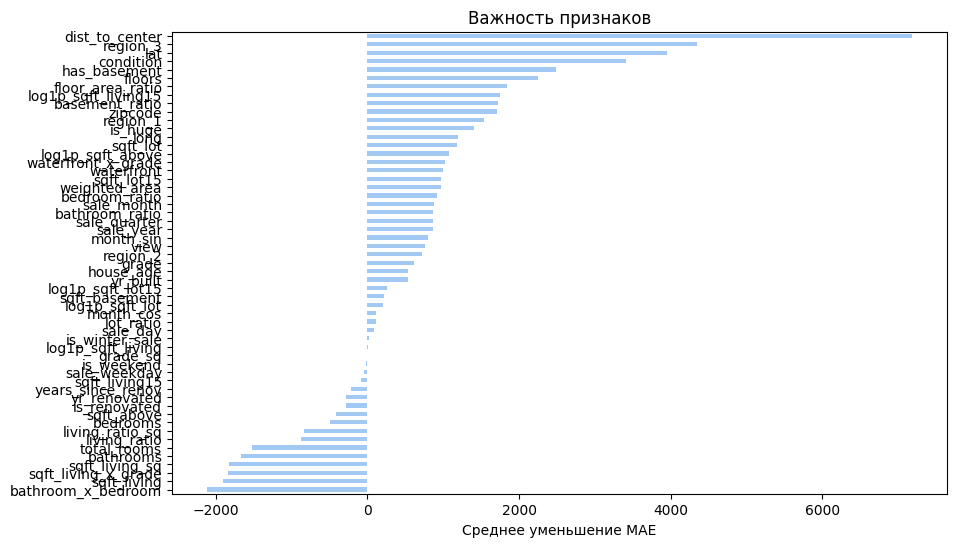

dist_to_center         7178.603181
region_3               4349.925552
lat                    3945.251778
condition              3413.786488
has_basement           2488.303513
floors                 2255.108080
floor_area_ratio       1842.962683
log1p_sqft_living15    1753.045927
basement_ratio         1729.366153
zipcode                1712.196664
region_1               1544.326462
is_huge                1404.069739
long                   1195.507081
sqft_lot               1187.157463
log1p_sqft_above       1078.093246
waterfront_x_grade     1029.422576
waterfront             1000.103505
sqft_lot15              974.019527
weighted_area           970.326119
bedroom_ratio           923.774398
sale_month              884.031409
bathroom_ratio          863.574504
sale_quarter            860.055922
sale_year               860.033376
month_sin               798.842405
view                    753.791634
region_2                724.005795
grade                   609.807654
house_age           

In [114]:
from sklearn.inspection import permutation_importance
def perm_importance(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
    importances = pd.Series(result.importances_mean, index=X.columns)
    importances.sort_values().plot(kind='barh', figsize=(10,6))
    plt.title('Важность признаков')
    plt.xlabel('Среднее уменьшение MAE')
    plt.show()
    print(importances.sort_values(ascending=False))

perm_importance(X3, y)

# RFE

In [115]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

est = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rfe = RFE(estimator=est, n_features_to_select=5, step=1)

X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)

rfe.fit(X_train, y_train)

ranks = pd.Series(rfe.ranking_, index=X_train.columns, name='RFE rank')

display(ranks.sort_values().to_frame())

,RFE rank
sqft_living15,1
sqft_living_x_grade,1
sqft_living,1
lat,1
dist_to_center,1
long,2
waterfront_x_grade,3
sqft_lot15,4
log1p_sqft_living,5
sqft_above,6


# Тест модели с отобранными фичами

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 53544239104.0
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 152403.97
RMSE: 231396.29
MAPE: 29.87%
R2 Score: 0.65


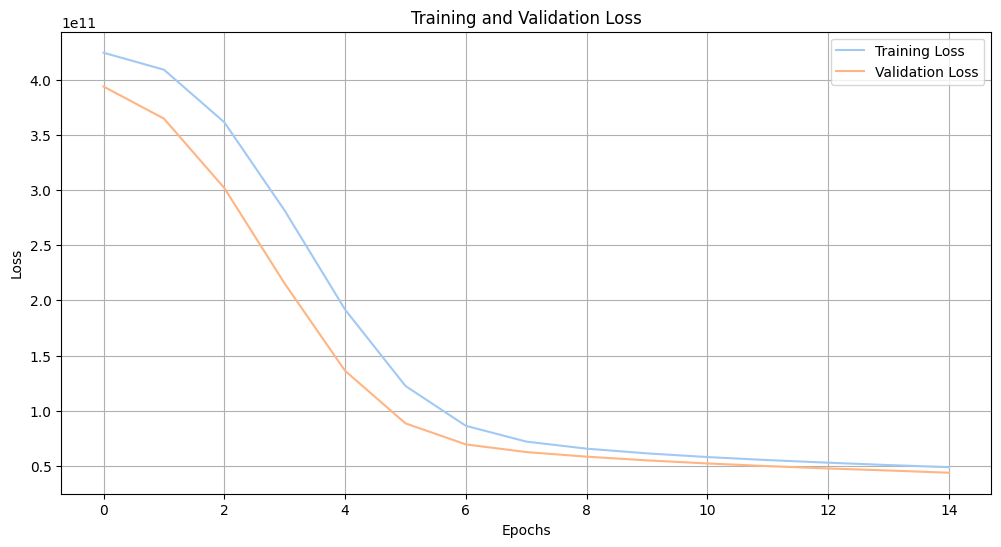

In [116]:
X4 = data.copy()
y = data['price'].values
X4 = pd.get_dummies(X4, columns=['region'], drop_first=True)
X4['years_since_renov'] = X4['years_since_renov'].fillna(X4['years_since_renov'].max())

X4 = X4[[
    'dist_to_center',
    'lat',
    'sqft_living',
    'sqft_living15',
    'sqft_living_x_grade',
    'region_3',
    'condition',
    'has_basement',
    'floors',
    'log1p_sqft_living15'
]]

model4 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X4.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model4.compile(optimizer='adam', loss='mean_squared_error')
test_neural_network(model4, X4, y)

Результаты модели уже лучше, с одобранными фичами

In [117]:
X5 = data.copy()
y = data['price'].values
X5 = pd.get_dummies(X5, columns=['region'], drop_first=True)
X5['years_since_renov'] = X5['years_since_renov'].fillna(X5['years_since_renov'].max())

X5 = X5[[
    'sqft_living15',
    'sqft_living_x_grade',
    'sqft_living',
    'lat',
    'dist_to_center',
    'waterfront_x_grade',
    'house_age',
    'view',
    'waterfront',
    'zipcode',
    'region_3',
    'condition',
    'has_basement',
    'floors',
    'grade'
]]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 42371383296.0
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 136345.59
RMSE: 205843.11
MAPE: 26.47%
R2 Score: 0.72


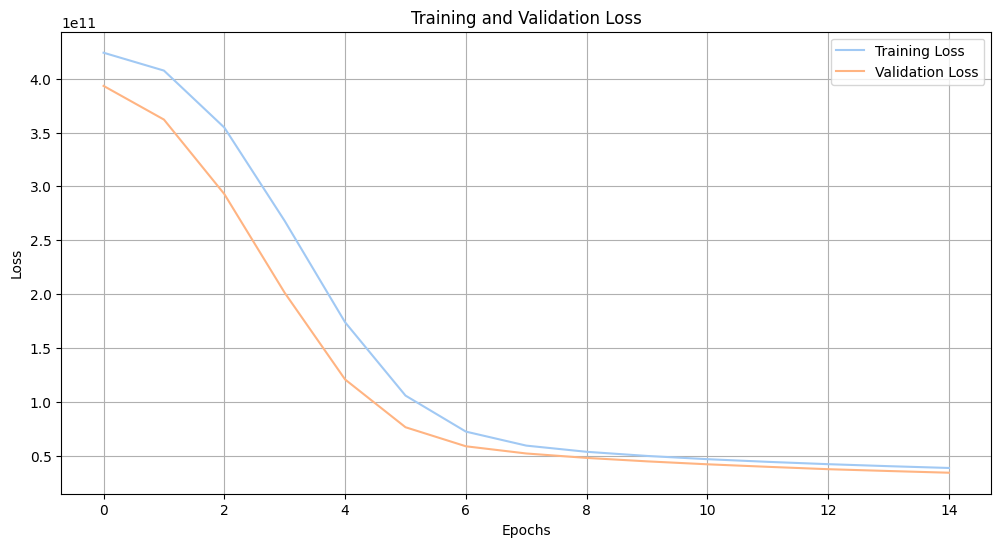

In [118]:
model5 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X5.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model5.compile(optimizer='adam', loss='mean_squared_error')
test_neural_network(model5, X5, y)

Пока лучший результат, взял переменные такие, чтобы не было слишком много повторений(например много фич с площадью)

Метрики уже хороши

In [119]:
X = X5
X.dtypes

sqft_living15            int64
sqft_living_x_grade      int64
sqft_living              int64
lat                    float64
dist_to_center         float64
waterfront_x_grade       int64
house_age                int64
view                     int64
waterfront               int64
zipcode                  int64
region_3                  bool
condition                int64
has_basement             int64
floors                 float64
grade                    int64
dtype: object

# Эксперименты с моделями

## Нейронные сети

Постараемся улучшить метрики. Для начала добавим еще нейронов

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 38479237120.0
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 125777.32
RMSE: 196161.25
MAPE: 24.38%
R2 Score: 0.75


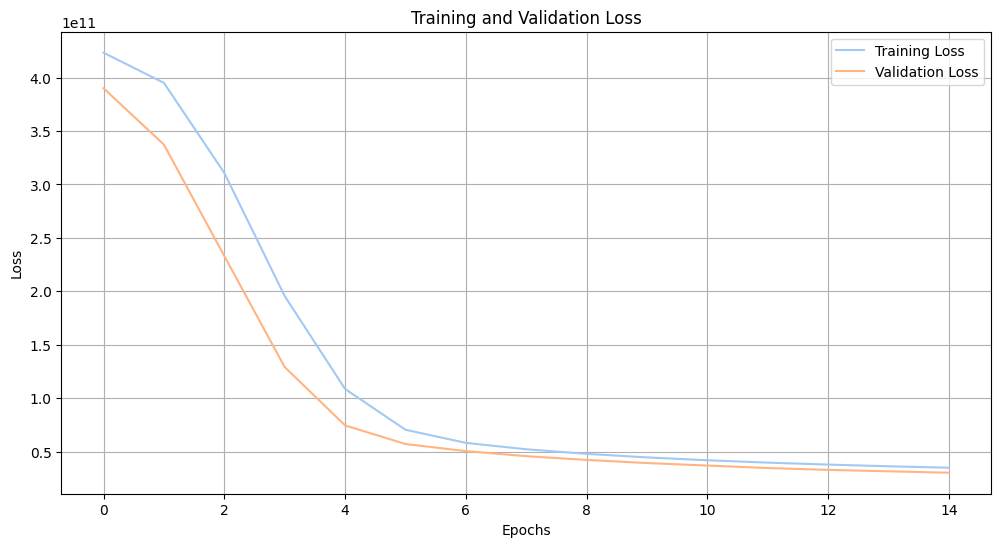

In [120]:
model6 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model6.compile(optimizer='adam', loss='mean_squared_error')
test_neural_network(model6, X, y)

Сейчас модель показывает отличные метрики, не переобучается. И даже с не самой сложной архитектурой выдает хороший результат

Поэкспериментируем с количеством эпох

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 33291104256.0
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 113903.79
RMSE: 182458.52
MAPE: 22.10%
R2 Score: 0.78


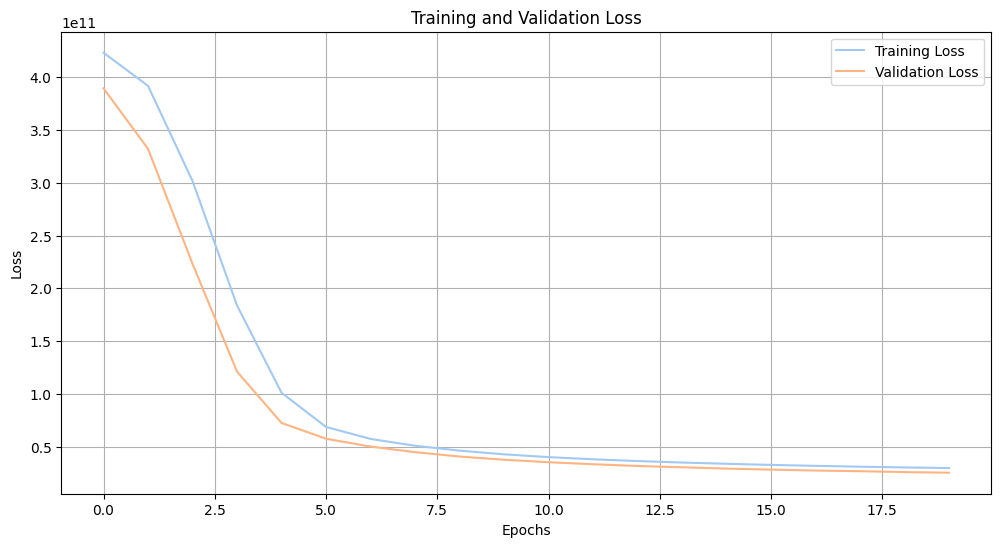

In [121]:
model7 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model7.compile(optimizer='adam', loss='mean_squared_error')
test_neural_network(model7, X, y, epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 29708001280.0
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 104624.87
RMSE: 172360.11
MAPE: 20.20%
R2 Score: 0.80


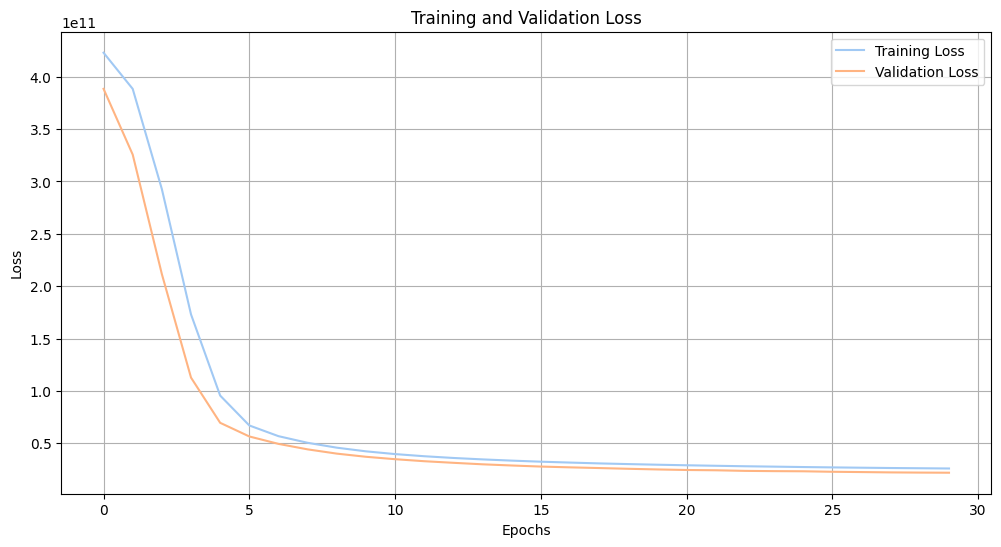

In [122]:
model8 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model8.compile(optimizer='adam', loss='mean_squared_error')
test_neural_network(model8, X, y, epochs=30)

Модель с увеличением числа эпох до сих пор продолжает обучаться и улучшать свои метрики. От 0 к 5 эпохе виден наибольший прирост, а после 15 все выходит на плато, но метрики становятся лучше

Во входном слое будет 256 нейронов, добавим еще 1 скрытый слой. И увеличим размер батча

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 24467646464.0
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 91630.04
RMSE: 156421.38
MAPE: 17.40%
R2 Score: 0.84


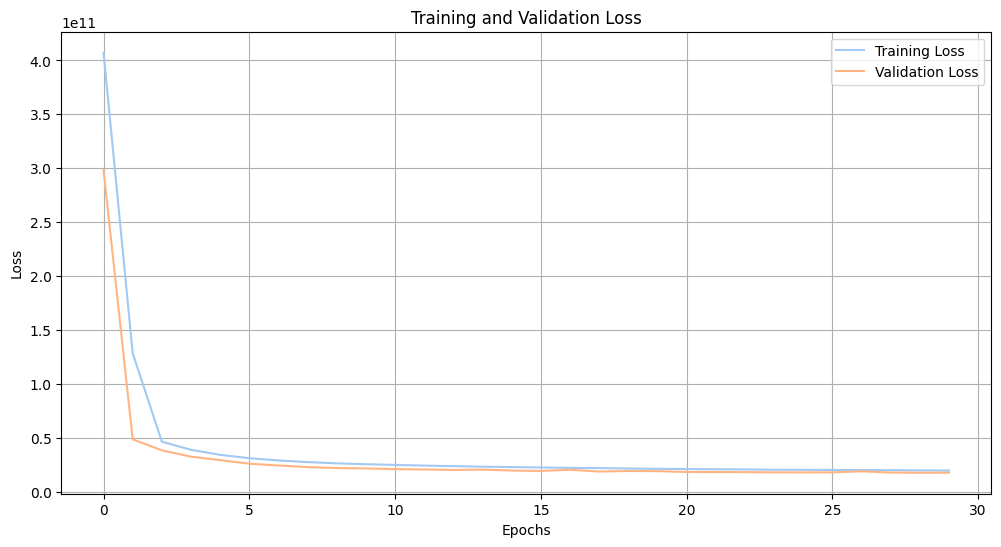

In [123]:
model9 = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X.shape[1],)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1) 
])

model9.compile(optimizer='adam', loss='mean_squared_error')
test_neural_network(model9, X, y, epochs=30, batch=64)

Попробую еще два хода, batch normalization и dropout слои. Конечно вряд ли droupout слои помогут, ведь модель не переобучается, нейроны откидывать не нужно, но хочется посмотреть на график

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 443771748352.0
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
MAE: 544696.46
RMSE: 666161.97
MAPE: 99.31%
R2 Score: -1.94


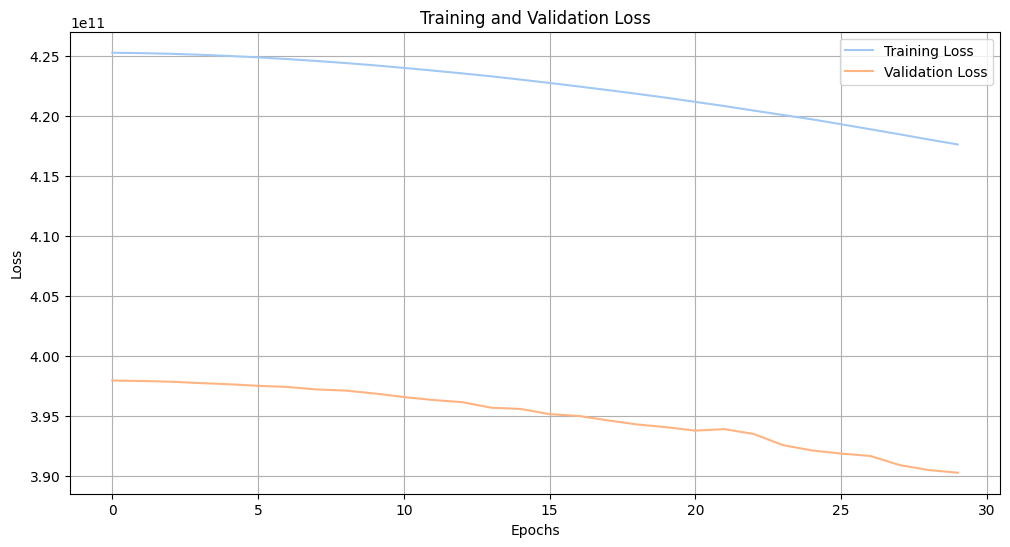

In [124]:
model10 = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(128, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(1) 
])

model10.compile(optimizer='adam', loss='mean_squared_error')
test_neural_network(model10, X, y, epochs=30, batch=64)

Да, чего и следовало ожидать

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 444493955072.0
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
MAE: 545129.75
RMSE: 666703.79
MAPE: 99.41%
R2 Score: -1.94


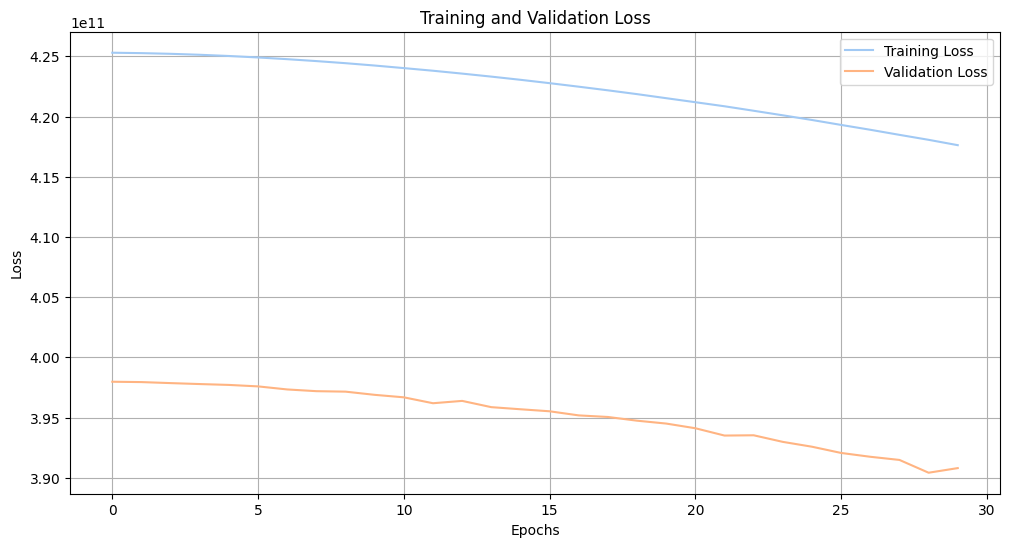

In [125]:
model11 = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X.shape[1],)),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(128, activation='relu'),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(1) 
])

model11.compile(optimizer='adam', loss='mean_squared_error')
test_neural_network(model11, X, y, epochs=30, batch=64)

В данной задаче BatchNormalization делает картину в разы хуже

Добавлю еще нейронов, увеличим в 2 раза в каждом слое

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 23562205184.0
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 89317.22
RMSE: 153499.87
MAPE: 16.76%
R2 Score: 0.84


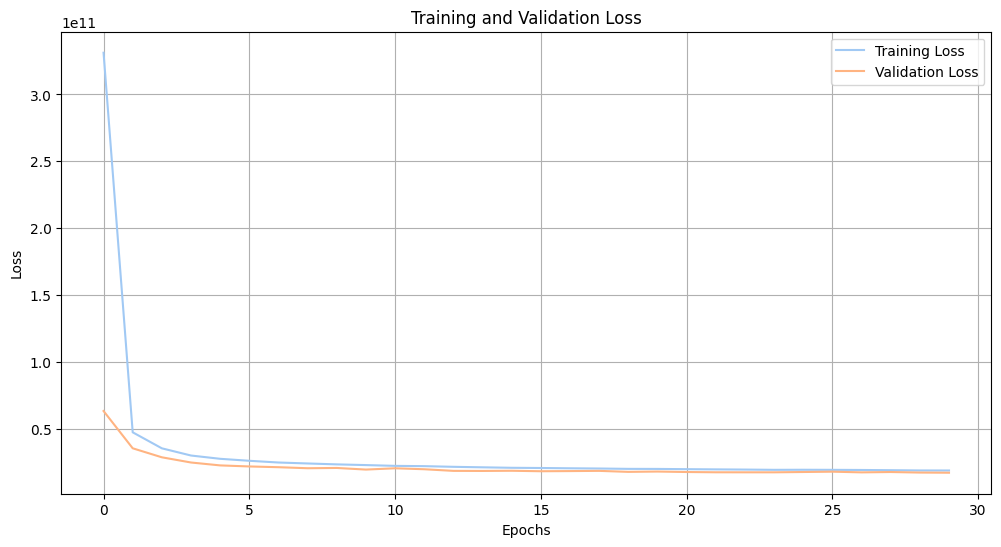

In [126]:
model12 = keras.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(X.shape[1],)),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(1) 
])

model12.compile(optimizer='adam', loss='mean_squared_error')
test_neural_network(model12, X, y, epochs=30, batch=64)

Результаты отличные, увеличим число эпох на 5 и на этом закончим

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 23212261376.0
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE: 88813.53
RMSE: 152355.72
MAPE: 16.71%
R2 Score: 0.85


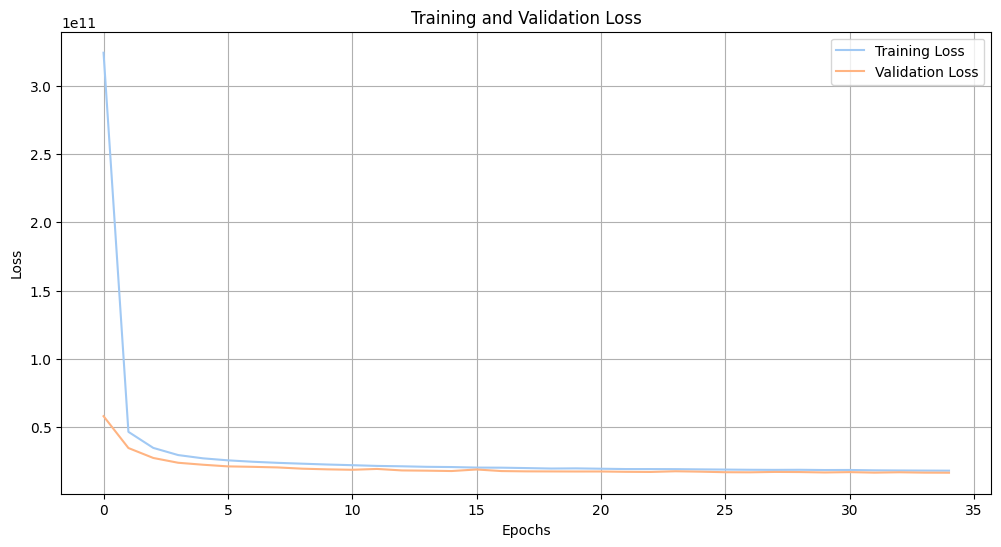

In [127]:
model13 = keras.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(X.shape[1],)),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(1)
])

model13.compile(optimizer='adam', loss='mean_squared_error')
test_neural_network(model13, X, y, epochs=35, batch=64)

Это будет итоговая модель нейронной сети

## Линейные

In [128]:
def test_linear(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R2 Score: {r2:.2f}")

Ниже протестируем три варианта моделей – обычную модель линейной регрессии, Lasso с l1 регуляризацией и ElasticNet, которая использует и l1, и l2 регуляризацию

In [129]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
test_linear(model_linear, X, y)

MAE: 115227.36
RMSE: 185901.93
MAPE: 22.69%
R2 Score: 0.77


In [130]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=1)
test_linear(model_lasso, X, y)

MAE: 115226.45
RMSE: 185900.70
MAPE: 22.69%
R2 Score: 0.77


In [131]:
from sklearn.linear_model import ElasticNet
model_elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
test_linear(model_elastic, X, y)

MAE: 116384.28
RMSE: 190302.81
MAPE: 23.07%
R2 Score: 0.76


Результаты очень похожие, но лучше всего справилась Lasso. Для линейных моделей метрики хорошие, но конечно они не могут конкурировать с нейронной сетью для данной задачи

## Деревья

Для деревьев возьмем RandomForest и подберем гиперпараметры леса через RandomizedSearchCV на 5 фолдах

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor()
params = {
    'n_estimators': np.arange(20, 201, 10),
    'max_depth': [8, 10, 12, 14, 16, 18, 20, None],
    'min_samples_split': [2, 5, 10, 20, 36, 50],
    'min_samples_leaf': [1, 2, 4, 8, 16, 32],
}

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42
)

random_search_rf.fit(X_train, y_train)
random_search_rf.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=70; total time=   3.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=70; total time=   3.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=70; total time=   3.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=70; total time=   3.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=70; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=32, min_samples_split=5, n_estimators=150; total time=   7.4s
[CV] END max_depth=None, min_samples_leaf=32, min_samples_split=5, n_estimators=150; total time=   7.3s
[CV] END max_depth=None, min_samples_leaf=32, min_samples_split=5, n_estimators=150; total time=   7.3s
[CV] END max_depth=None, min_samples_leaf=32, min_samples_split=5, n_estimators=150; total time=   7.3s
[CV] END max_dept

{'n_estimators': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 18}

In [133]:
best_rf = random_search_rf.best_estimator_
y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 72464.84
RMSE: 130247.69
MAPE: 13.41
R2 Score: 0.89


Лес показал отличные результаты, лучше, чем у нейронной сети. Удалось подобрать лучшие параметры по RandomizedSearchCV. Однако деревья очень склонны к переобучению, поэтому нужно будет в конце проверить модели на кросс-валидации

## Градиентный бустинг

Для градиентного бустинга выбрал XGBRegressor. Также подберу гиперпараметры через RandomizedSearchCV

In [134]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor(random_state=42)

param_distributions = {
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500, 1000],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=15, n_estimators=300, subsample=0.6; total time=   7.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=15, n_estimators=300, subsample=0.6; total time=   8.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=15, n_estimators=300, subsample=0.6; total time=   7.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=15, n_estimators=300, subsample=0.6; total time=   7.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=15, n_estimators=300, subsample=0.6; total time=   7.3s
[CV] END colsample_bytree=0.8, learning_rate=0.005, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.005, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.005, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.8s
[C

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.005, 0.01, 0.05,
                                                          0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10, 15],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [135]:
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 69678.90
RMSE: 123710.96
MAPE: 13.04
R2 Score: 0.90


Пока это лучшие метрики, но больно уж высокие. Проверим позже на кросс-валидации, насколько переобучена модель

# Выводы по моделям

**Сравнение моделей**:

1. Линейная регрессия (Lasso) ожидаемо показала самые слабые результаты: все метрики хуже, чем у остальных моделей. Модель плохо улавливает сложные нелинейные зависимости
2. Нейронная сеть показала заметно лучший результат по сравнению с линейной регрессией, но уступает ансамблевым моделям. Основные метрики MAE, RMSE, MAPE — выше, R2 — ниже, чем у RandomForest и XGBoost
3. RandomForest дал уверенно хорошие показатели и опередил нейронную сеть по всем метрикам. Ошибки (MAE, RMSE, MAPE) ниже, а R2 выше, но возможен небольшой риск переобучения
4. XGBoost показал лучшие результаты: минимальные ошибки (MAE, RMSE, MAPE) и максимальный R2. По этим метрикам модель превосходит все остальные и демонстрирует максимальное качество прогноза

**Выводы**:

1. XGBoost — самая точная модель на текущих данных, она дает наилучшие результаты по всем основным метрикам
2. RandomForest также очень эффективен, но чуть уступает XGBoost. Оба алгоритма существенно превосходят нейронную сеть и линейную регрессию
3. Нейронная сеть работает хорошо, вряд ли склонна к переобучению, что видно по графику.
4. Линейная регрессия неплохо подходит как базовый ориентир, но для реальных задач прогнозирования цен на дома гораздо лучше использовать ансамбли или глубокие модели.

P.S. Финальные выводы могут немного измениться после проведения кросс-валидации, возможно нейронная сеть улучшит свои позиции

# Кросс-валидация лучших моделей

In [136]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import keras

def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.where(y_true == 0, np.mean(y_true), y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def compare_models_cross_val(models, X, y, cv=5, epochs=35):
    results = {
        "Model": [],
        "MAE": [],
        "RMSE": [],
        "MAPE": [],
        "R2": []
    }

    if not hasattr(y, 'iloc'):
        y = pd.Series(y)
    
    for name, model in models.items():
        if isinstance(model, Model):
            maes, rmses, mapes, r2s = [], [], [], []
            for train_idx, test_idx in KFold(n_splits=cv, shuffle=True, random_state=42).split(X):
                if hasattr(X, 'iloc'):
                    X_train = X.iloc[train_idx]
                    X_test  = X.iloc[test_idx]
                else:
                    X_train = X[train_idx]
                    X_test  = X[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
               
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)

                model_copy = keras.models.clone_model(model)
                model_copy.compile(optimizer='adam', loss='mean_squared_error')
                model_copy.fit(X_train, y_train, epochs=epochs, batch_size=64, verbose=0)
                y_pred = model_copy.predict(X_test).ravel()

                maes.append(mean_absolute_error(y_test, y_pred))
                rmses.append(mean_squared_error(y_test, y_pred) ** 0.5)
                mapes.append(mean_absolute_percentage_error(y_test, y_pred))
                r2s.append(r2_score(y_test, y_pred))
            
            mae = np.mean(maes)
            rmse = np.mean(rmses)
            mape = np.mean(mapes)
            r2 = np.mean(r2s)
        else:
            mae = -np.mean(cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1))
            rmse = (-np.mean(cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1))) ** 0.5

            mapes = []
            for train_idx, test_idx in KFold(n_splits=cv, shuffle=True, random_state=42).split(X):
                if hasattr(X, 'iloc'):
                    X_train = X.iloc[train_idx]
                    X_test  = X.iloc[test_idx]
                else:
                    X_train = X[train_idx]
                    X_test  = X[test_idx]

                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

                model_clone = type(model)(**model.get_params())
                model_clone.fit(X_train, y_train)
                y_pred = model_clone.predict(X_test)
                mapes.append(mean_absolute_percentage_error(y_test, y_pred))
            mape = np.mean(mapes)

            r2 = np.mean(cross_val_score(model, X, y, cv=cv, scoring='r2', n_jobs=-1))

        results["Model"].append(name)
        results["MAE"].append(mae)
        results["RMSE"].append(rmse)
        results["MAPE"].append(mape)
        results["R2"].append(r2)

    fig, ax = plt.subplots(1, 4, figsize=(22, 6))
    metrics = ["MAE", "RMSE", "MAPE", "R2"]
    for i, metric in enumerate(metrics):
        ax[i].bar(results["Model"], results[metric], color='#A8C69F')
        ax[i].set_title(metric)
        ax[i].set_xticklabels(results["Model"], rotation=45, ha="right")
        ax[i].set_ylabel(metric)
        ax[i].grid(True)
    plt.tight_layout()
    plt.show()

    return results

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/tmp/ipykernel_13/3316088292.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(results["Model"], rotation=45, ha="right")


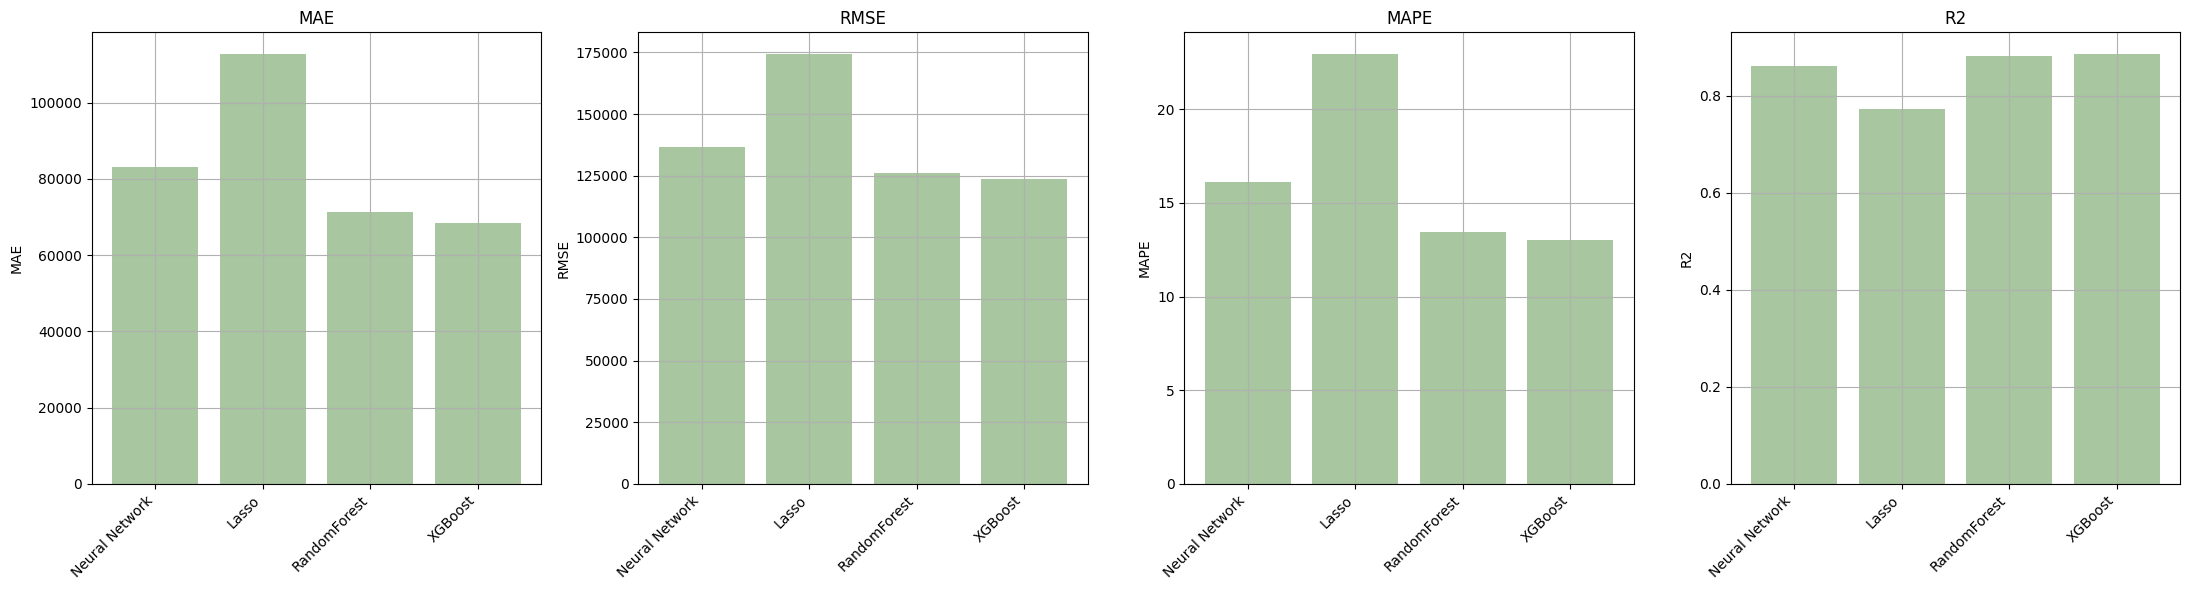

Neural Network: MAE=83011.17, RMSE=136576.81, MAPE=16.14%, R2=0.86
Lasso: MAE=112846.10, RMSE=174421.39, MAPE=22.96%, R2=0.77
RandomForest: MAE=71291.96, RMSE=126219.47, MAPE=13.47%, R2=0.88
XGBoost: MAE=68557.12, RMSE=123540.25, MAPE=13.02%, R2=0.89


In [137]:
models = {
    "Neural Network": model13,
    "Lasso": model_lasso,
    "RandomForest": best_rf,
    "XGBoost": best_xgb
}

results = compare_models_cross_val(models, X, y)

for model, mae, rmse, mape, r2 in zip(results["Model"], results["MAE"], results["RMSE"], results["MAPE"], results["R2"]):
    print(f"{model}: MAE={mae:.2f}, RMSE={rmse:.2f}, MAPE={mape:.2f}%, R2={r2:.2f}")

* XGBoost — лидер по всем метрикам. Если требуется максимальная точность, стоит использовать именно его
* RandomForest также отлично себя проявил, различия с XGBoost не критичны
* Нейронная сеть может быть альтернативой при более глубокой настройке, увеличении объема данных или усложнении архитектуры, но сейчас проигрывает ансамблевым методам
* Линейная регрессия демонстрирует ограниченную применимость для такой задачи, так как не способна учитывать сложные нелинейные зависимости

# Итоговый вывод

* В ходе выполнения работы я провел подробный разведочный анализ данных для каждой колонки исходного датасета. Анализировал распределения, визуализировал взаимосвязи с таргетом и между самими признаками. Это позволило выявить ключевые закономерности и наметить направления для создания новых, более информативных признаков.

* Особое внимание уделял feature engineering: был реализован ряд новых фичей, комбинирующих исходные параметры — от полиномиальных взаимодействий до географических и категориальных производных (например, расстояние до центра, различные соотношения площадей, взаимодействие grade с локацией и т.д). Именно эти признаки часто попадали в топ по permutation importance, rfe, помогали моделям лучше объяснять цену продажи дома. Однако стоит отметить, что среди признаков наблюдалась значительная корреляция, и не все новые фичи приводили к приросту качества модели.

* Несмотря на тщательную проработку фичей, данные нельзя назвать абсолютно репрезентативными — итоговый таргет может зависеть от множества внешних факторов, не отраженных в датасете (состояние рынка, индивидуальные особенности объектов, маркетинг, сезонные колебания и пр.). Поэтому добиться прям идеального предсказания, используя только имеющиеся параметры, сложно. Но результат оказался уже достойным.

* На этапе моделирования был проведен большой перебор архитектур нейронных сетей, деревьев решений, случайных лесов, градиентного бустинга (XGBoost) и линейных моделей (Lasso). Для каждой модели подбирались оптимальные параметры с помощью RandomizedSearchCV.

* Особенно тщательно тестировал нейросеть: перебирал количество нейронов, регуляризации, batch normalization, dropout и размер батча. Удалось получить модель, которая демонстрирует стабильное обучение и избегает переобучения, что подтверждается кривыми loss и результатами на валидации.

* Для финального сравнения все лучшие модели были протестированы на кросс-валидации по метрикам MAE, RMSE, MAPE, R2. Лучшими оказались XGBoost и RandomForest, показавшие минимальные ошибки и наилучшее качество предсказания (R2 до 0.89). Нейронная сеть тоже показала высокий уровень, уступив ансамблевым моделям, а линейная регрессия существенно проиграла по всем показателям.